In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import datetime
from PIL import Image

pd.options.display.max_columns = None

%matplotlib inline

streets_lon_lat = pd.read_csv('./datasets/street_lon_lat.csv', index_col=0)
streets_lon_lat.reset_index(inplace=True)
streets_lon_lat.rename(columns={'index' : 'combined'}, inplace=True)

stations_lon_lat = pd.read_csv('./datasets/stations_lon_lat.csv', index_col=0)

flat_primary_distance = pd.read_csv('./datasets/flat_primary_distance.csv', index_col=0)
flat_secondary_distance = pd.read_csv('./datasets/flat_secondary_distance.csv', index_col=0)
flat_primary_distance.reset_index(inplace=True)
flat_secondary_distance.reset_index(inplace=True)
flat_primary_distance.rename(columns={'index' : 'combined'}, inplace=True)
flat_secondary_distance.rename(columns={'index' : 'combined'}, inplace=True)

hdb_rpi = pd.read_csv('./datasets/HDB RPI.csv')
hdb_rpi['Deflator'] = hdb_rpi['index'].apply(lambda x: hdb_rpi.loc[hdb_rpi.index[-1], 'index']/x)
hdb_rpi.index = pd.to_datetime(hdb_rpi['quarter']).apply(lambda x: x + datetime.timedelta(65))
hdb_rpi.drop(columns=['quarter'], inplace=True)


all_data = pd.read_csv('./datasets/merged_dataset_part1.csv', index_col=0).append(pd.read_csv('./datasets/merged_dataset_part2.csv', index_col=0))

## Time-Related EDA

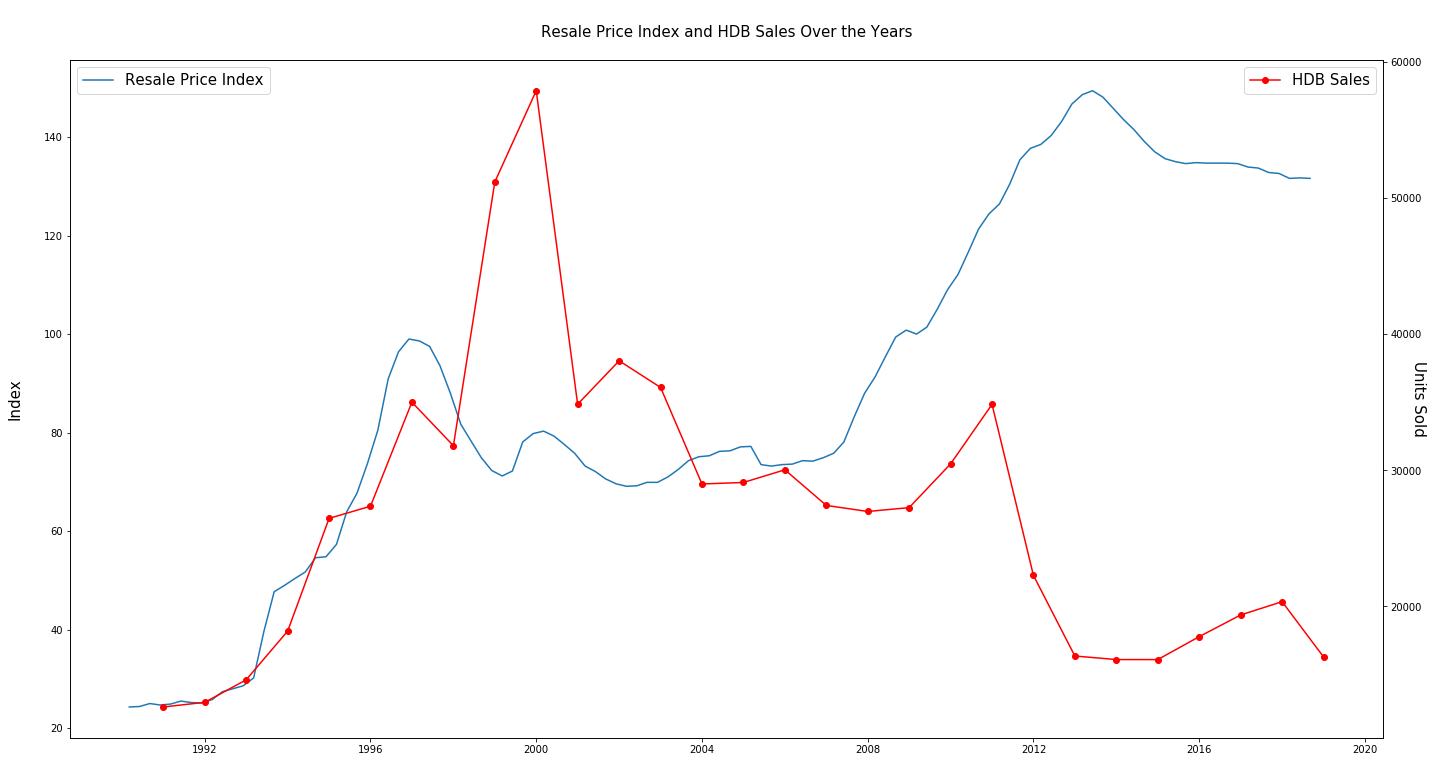

In [119]:
fig, ax1 = plt.subplots(figsize=(20, 10))

ax1.set_xlabel(None)
ax1.set_ylabel('Index\n', fontsize=15)
ax1.plot(hdb_rpi['index'], label='Resale Price Index')

plt.legend(loc='upper left', fontsize=15)

ax2 = ax1.twinx()

ax2.set_ylabel('Units Sold', rotation=270, fontsize=15)
ax2.plot(all_data['Year Sold'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y') + datetime.timedelta(365)).to_frame().merge(all_data[[col for col in all_data.columns if col != 'Year Sold']], how='left', right_index=True, left_index=True)['Year Sold'].value_counts().sort_index(), marker='o', c='red', label='HDB Sales')

plt.legend(loc='upper right', fontsize=15)
# fig.legend(loc='best', fontsize=15)

fig.tight_layout()

plt.title('\nResale Price Index and HDB Sales Over the Years\n', fontsize=15)

plt.show()

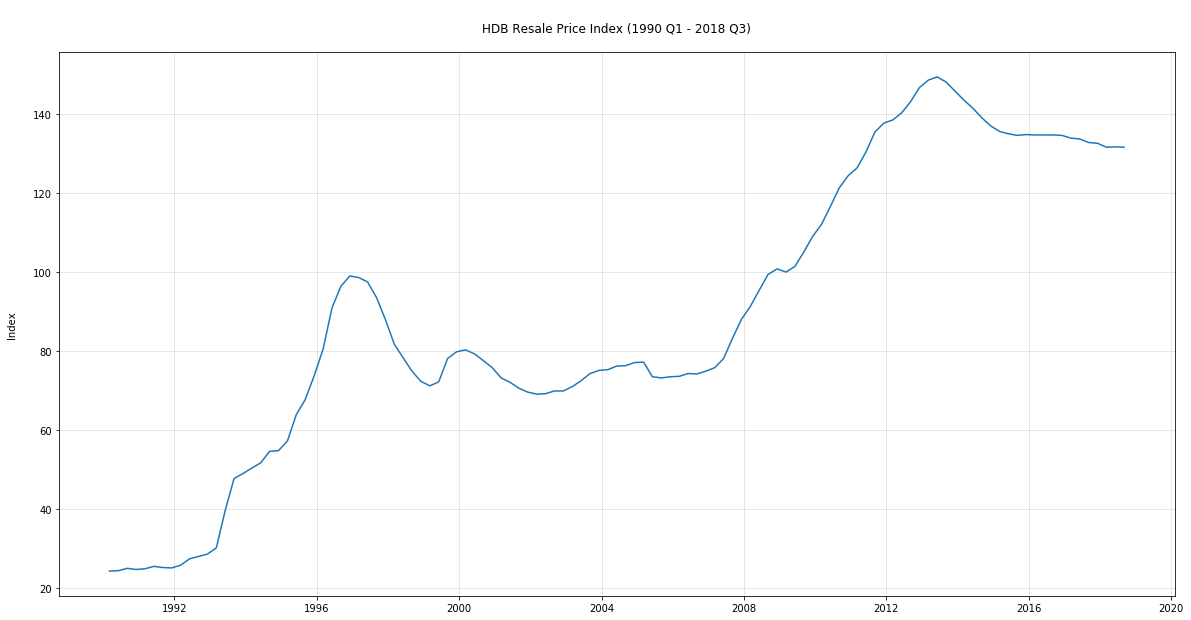

In [83]:
plt.figure(figsize=(20, 10))
plt.plot(hdb_rpi['index'])
plt.grid(lw=1, alpha=0.3)
plt.title('\nHDB Resale Price Index (1990 Q1 - 2018 Q3)\n')
plt.ylabel('Index\n')
plt.show()

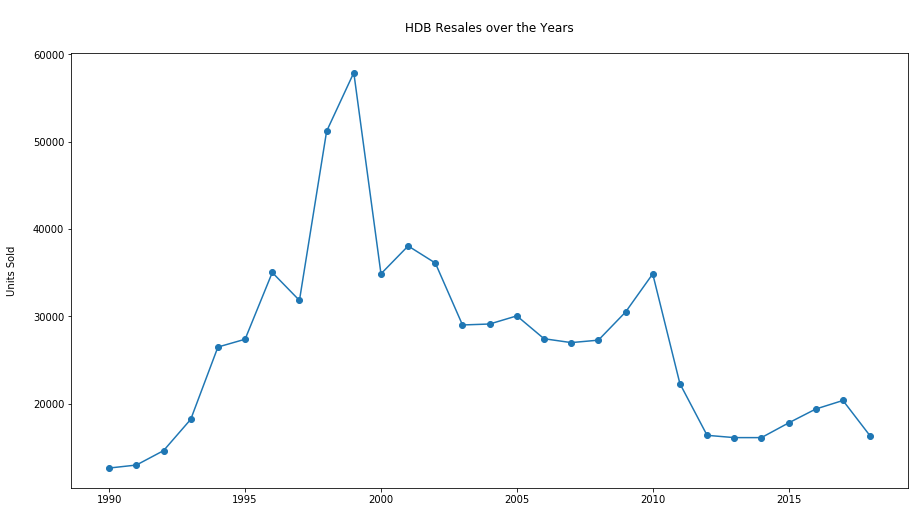

In [77]:
all_data['Year Sold'].value_counts().sort_index().plot(kind='line', figsize=(15, 8), marker='o')
plt.title('\nHDB Resales over the Years\n')
plt.ylabel('Units Sold\n')
plt.show()

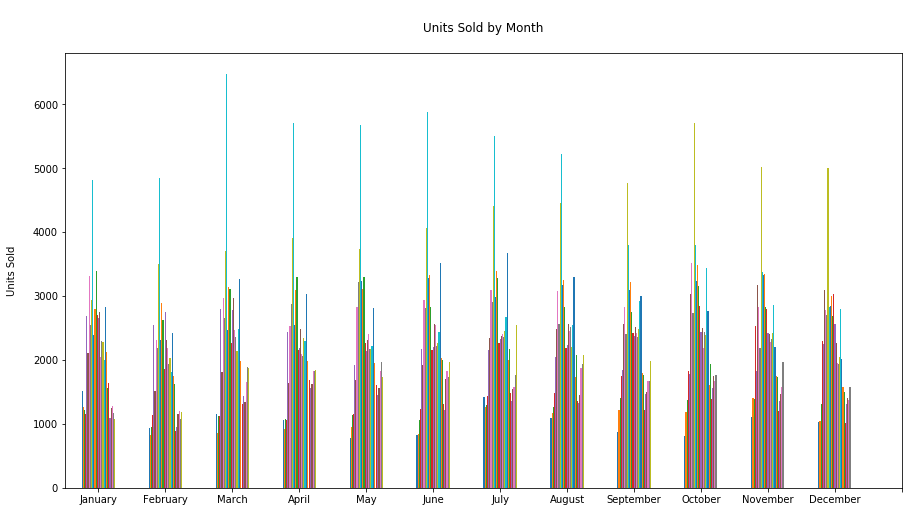

In [73]:
fig, ax = plt.subplots(figsize=(15, 8))
all_data.groupby(['Month Sold', 'Year Sold']).count()['Month'].unstack().plot(kind='bar', ax=ax)
leg = ax.legend()
leg.remove()
plt.title('\nUnits Sold by Month\n')
plt.ylabel('Units Sold\n')
plt.xlabel(None)
plt.xticks(np.arange(0, 13, 1), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=0)
plt.show()

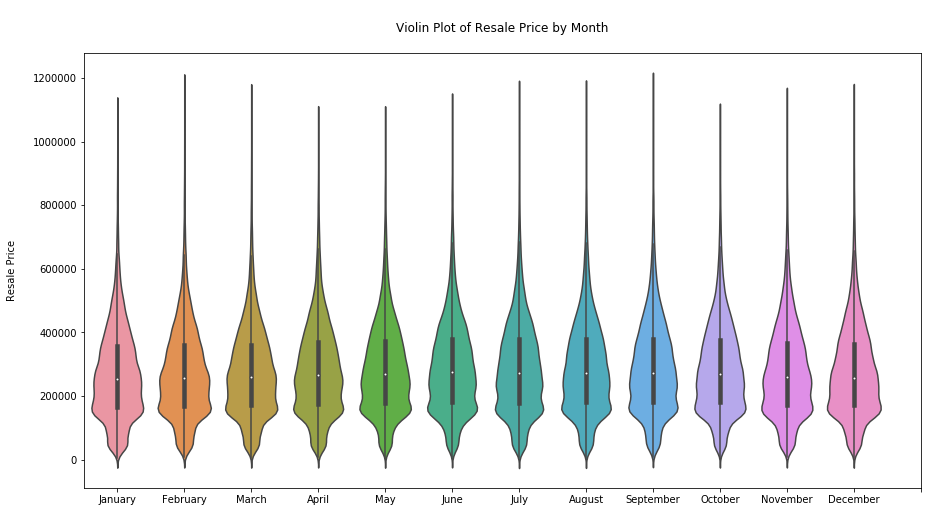

In [3]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=all_data, x='Month Sold', y='Resale Price', ax=ax)
plt.title('\nViolin Plot of Resale Price by Month\n')
plt.ylabel('Resale Price\n')
plt.xlabel(None)
plt.xticks(np.arange(0, 13, 1), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=0)
plt.show()

#### Misleading Violin Plot ahead! Does not make sense to plot deflated resale price against month.. price has already been adjusted by deflator

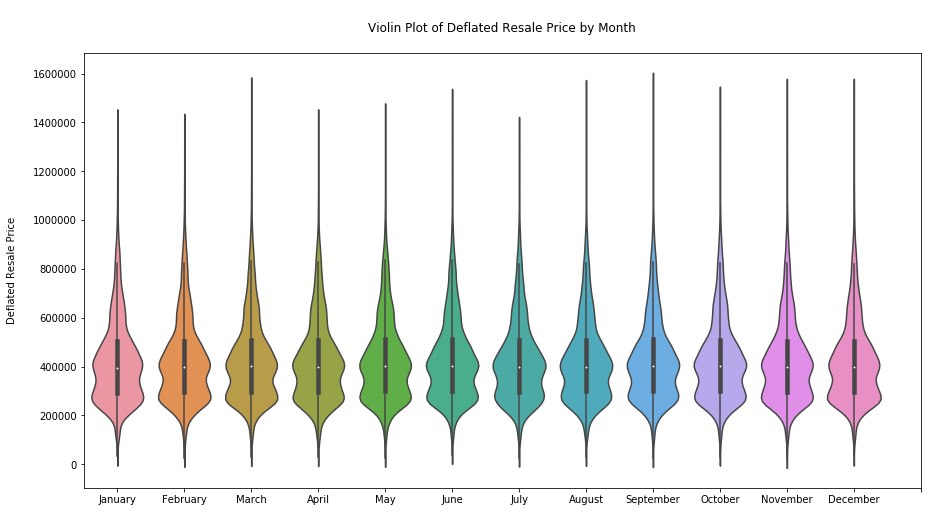

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=all_data, x='Month Sold', y='Deflated Resale Price', ax=ax)
plt.title('\nViolin Plot of Deflated Resale Price by Month\n')
plt.ylabel('Deflated Resale Price\n')
plt.xlabel(None)
plt.xticks(np.arange(0, 13, 1), labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=0)
plt.show()

## Geolocation EDA

In [4]:
image = Image.open('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).png').convert('L')
arr = np.asarray(image)

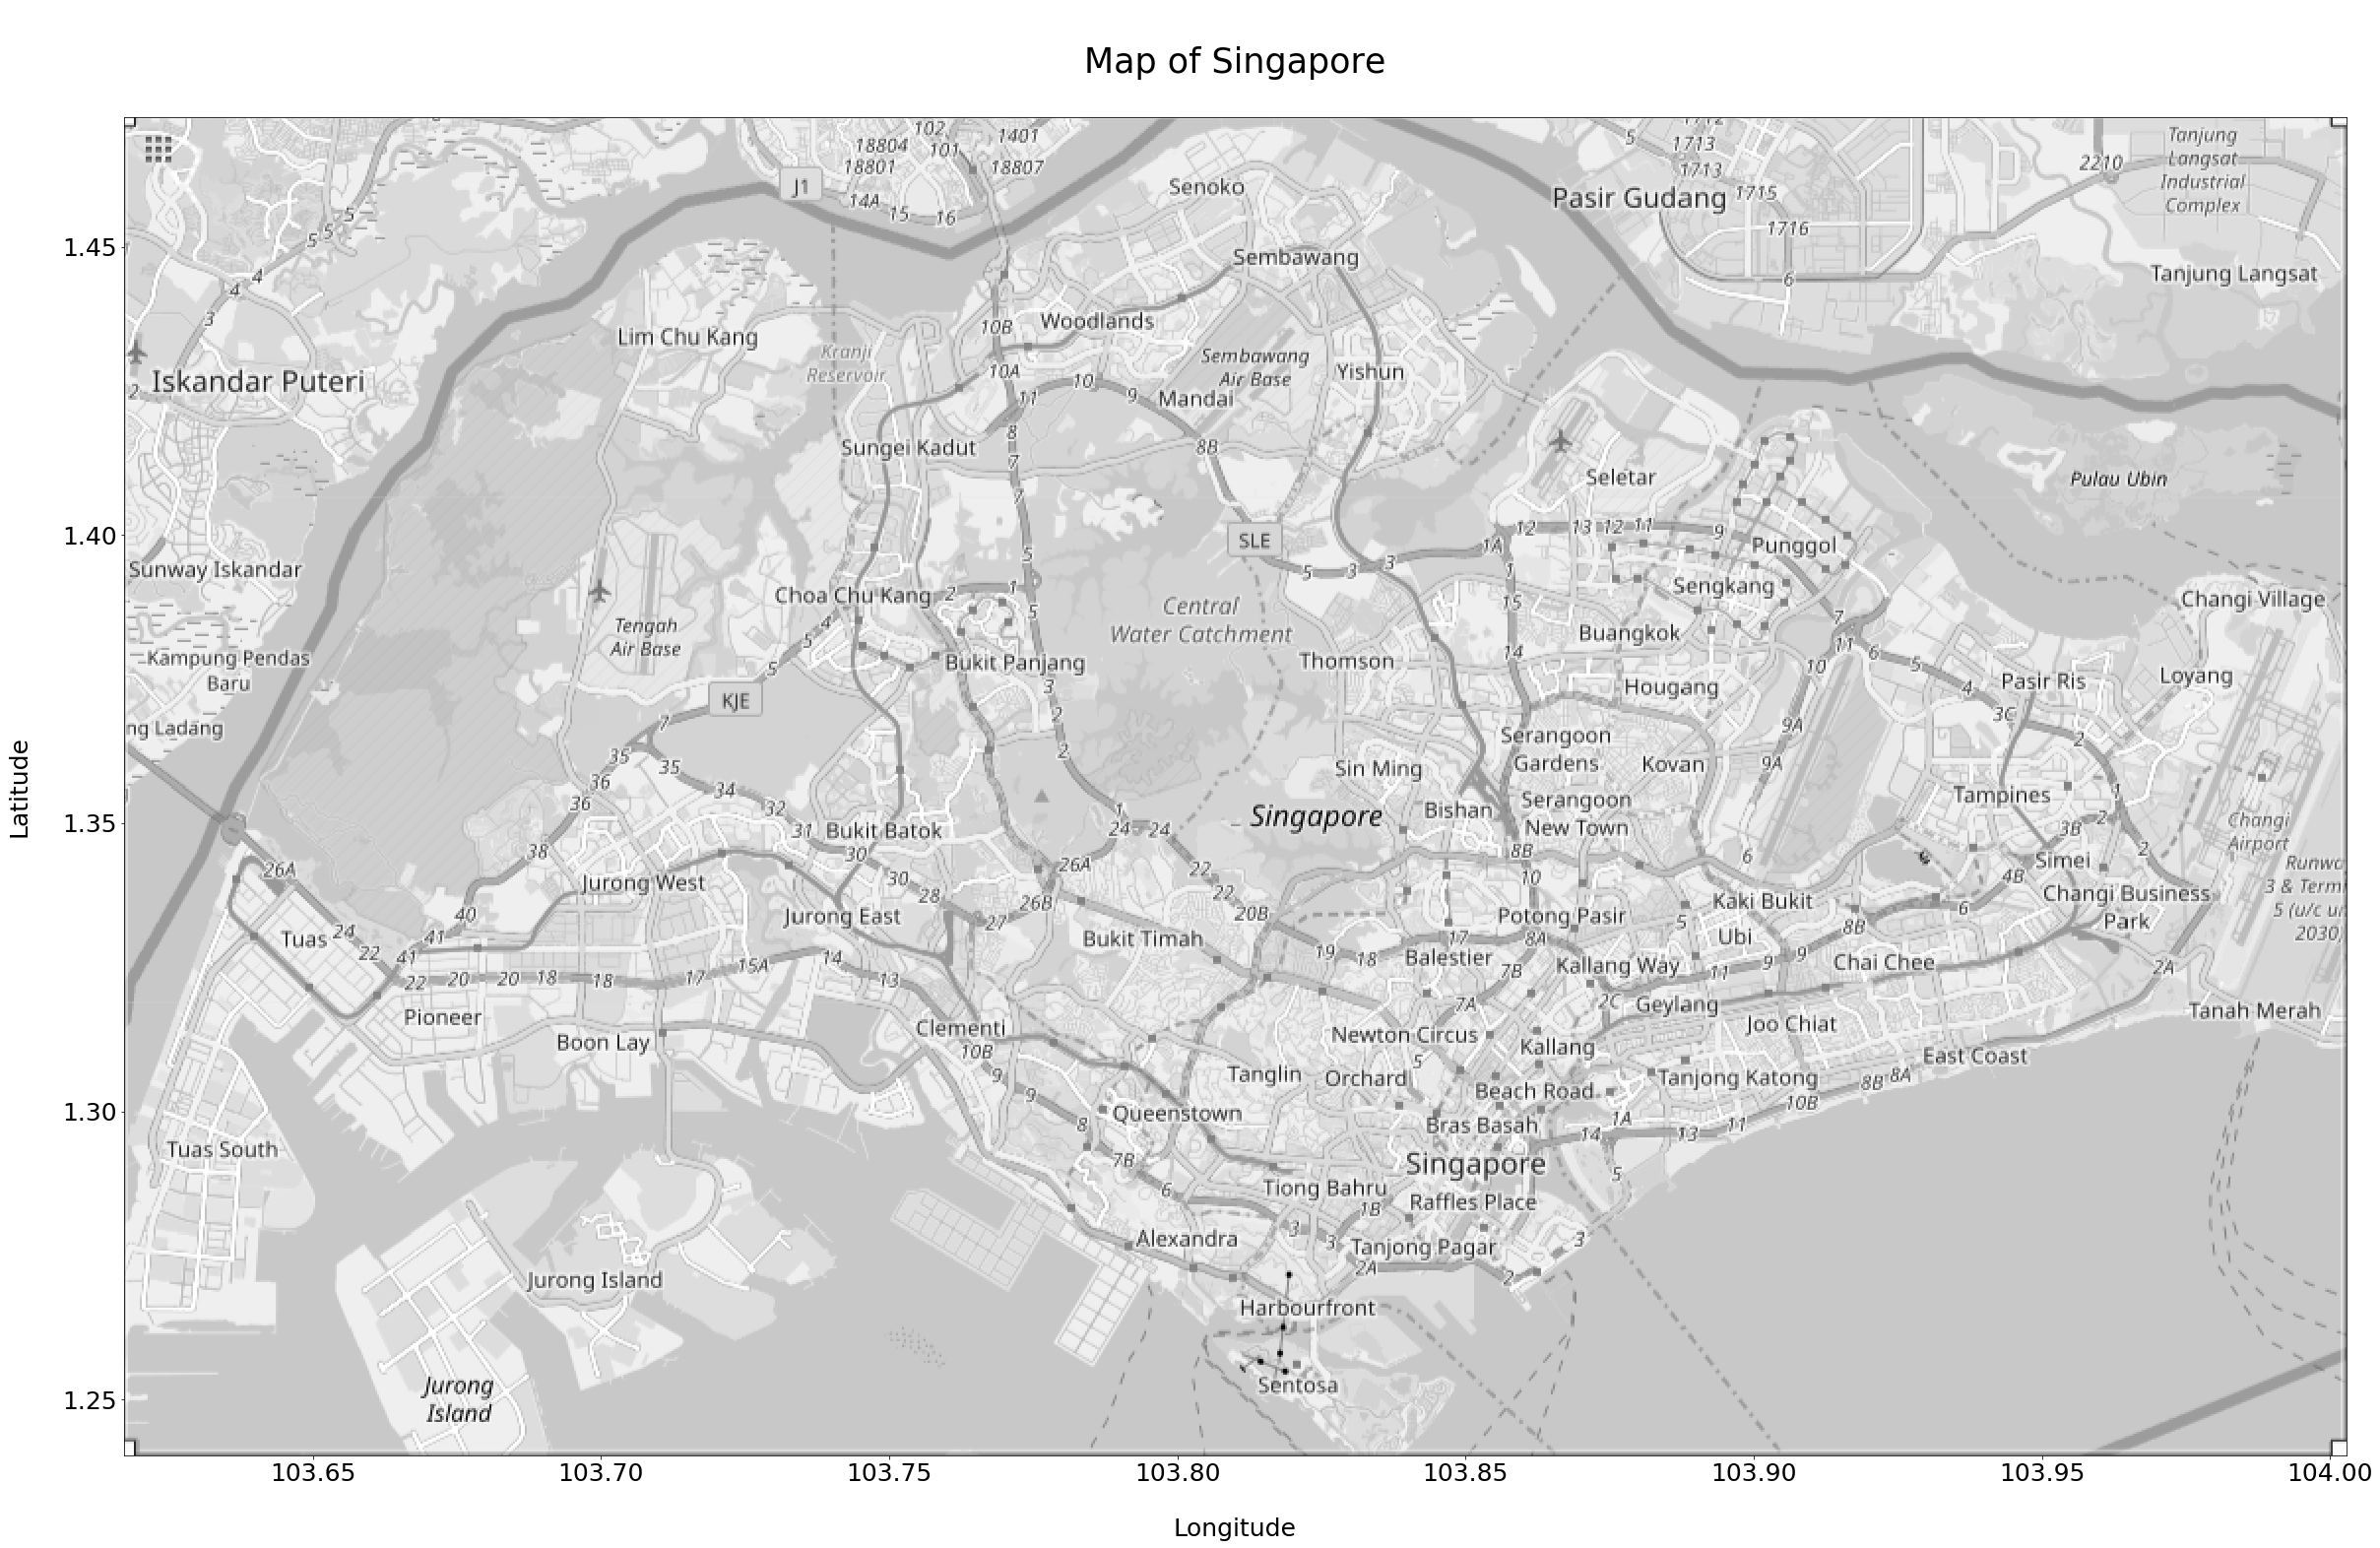

In [31]:
lon_lat_box = (103.6172, 104.0028, 1.2403, 1.4725)

plt.figure(figsize=(50,25))
plt.imshow(X=arr, cmap='gray',
           extent=lon_lat_box)
plt.xlabel('\nLongitude', fontsize=25)
plt.ylabel('Latitude\n', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nMap of Singapore\n', fontsize=25)

# plt.scatter(stations_lon_lat['Longitude'], stations_lon_lat['Latitude'], marker='^', c='r', facecolors='red', lw=10, alpha=0.7, label='Stations')
# plt.scatter(streets_lon_lat['Longitude'], streets_lon_lat['Latitude'], marker='o', c='blue', facecolors='red', lw=5, alpha=0.05, label='HDB Flats')
# plt.scatter(all_data['Longitude'], all_data['Latitude'], marker='o', c='blue', lw=0.1, alpha=0.002, label='HDB Flats')
# plt.scatter(flat_primary_distance['Primary Longitude'], flat_primary_distance['Primary Latitude'], marker='x', c='black', lw=5, label='Primary Schools')
# plt.scatter(flat_secondary_distance['Secondary Longitude'], flat_secondary_distance['Secondary Latitude'], marker='+', c='orange', lw=5, label='Secondary Schools')


# leg = plt.legend(loc='upper right', fontsize=20)
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)

plt.show()

# np.savetxt('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).txt', arr)

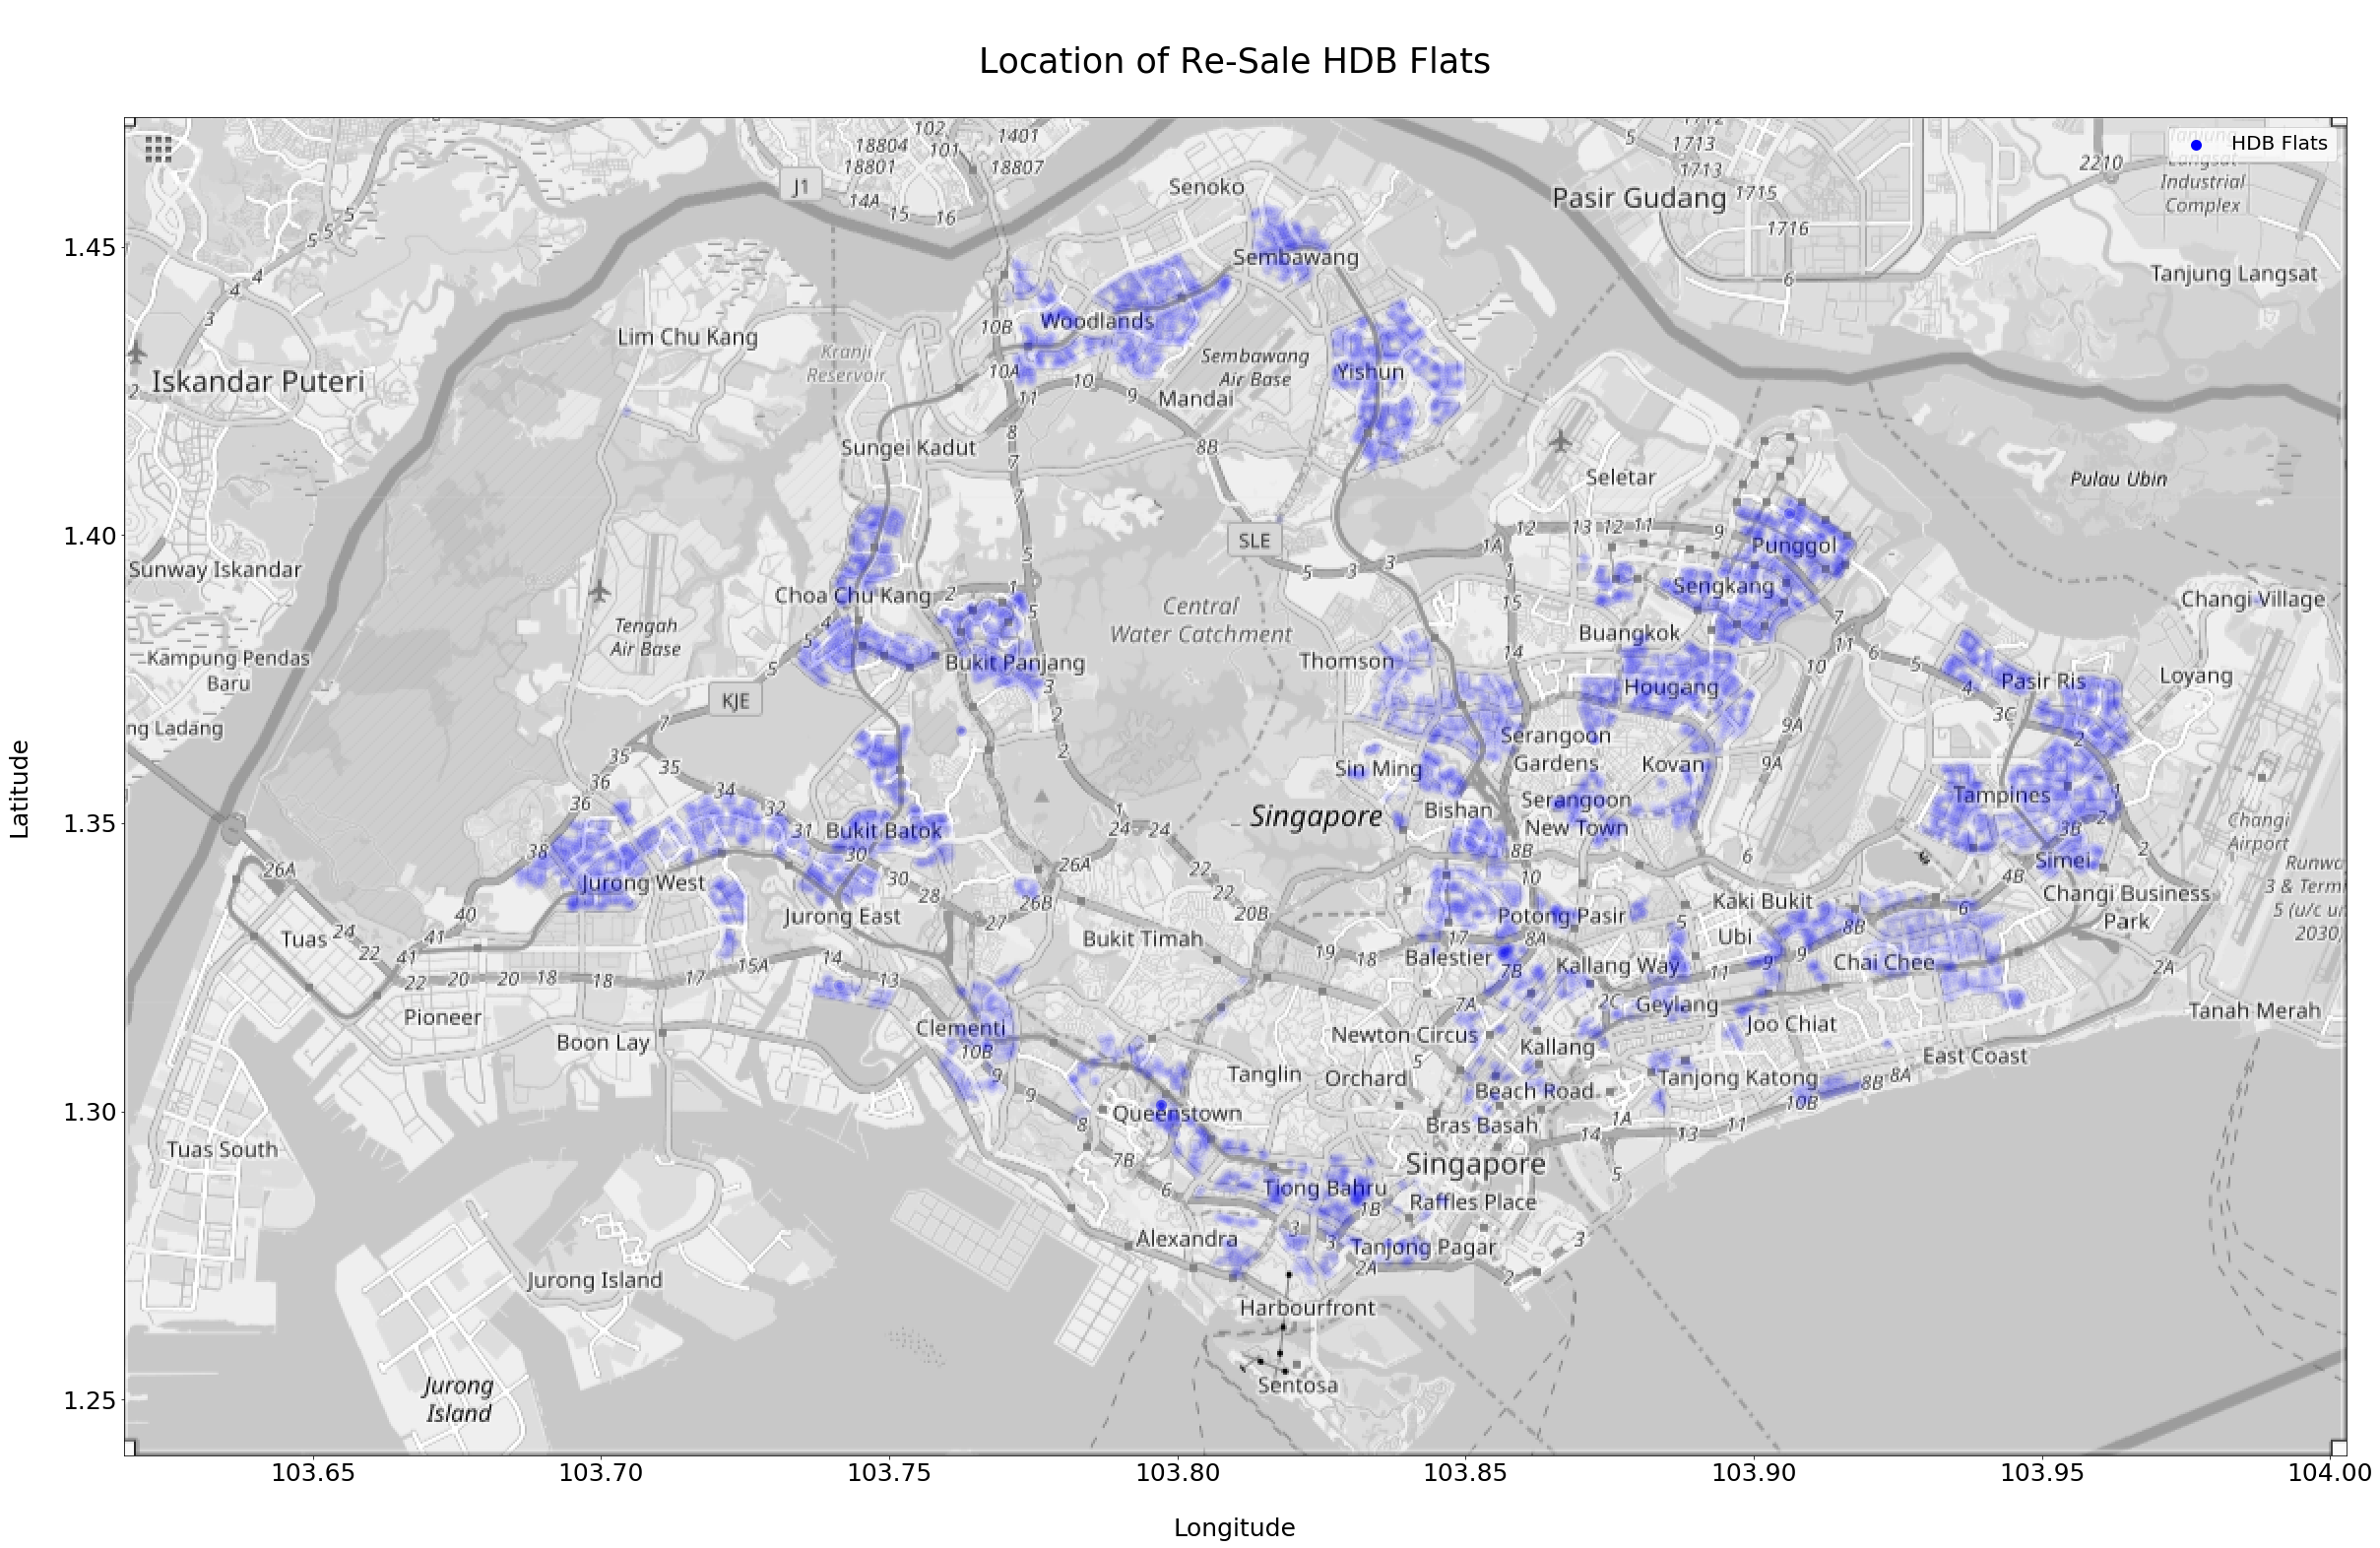

In [32]:
lon_lat_box = (103.6172, 104.0028, 1.2403, 1.4725)

plt.figure(figsize=(50,25))
plt.imshow(X=arr, cmap='gray',
           extent=lon_lat_box)
plt.xlabel('\nLongitude', fontsize=25)
plt.ylabel('Latitude\n', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nLocation of Re-Sale HDB Flats\n', fontsize=25)

# plt.scatter(stations_lon_lat['Longitude'], stations_lon_lat['Latitude'], marker='^', c='r', facecolors='red', lw=10, alpha=0.7, label='Stations')
plt.scatter(streets_lon_lat['Longitude'], streets_lon_lat['Latitude'], marker='o', c='blue', facecolors='red', lw=5, alpha=0.05, label='HDB Flats')
# plt.scatter(all_data['Longitude'], all_data['Latitude'], marker='o', c='blue', lw=0.1, alpha=0.002, label='HDB Flats')
# plt.scatter(flat_primary_distance['Primary Longitude'], flat_primary_distance['Primary Latitude'], marker='x', c='black', lw=5, label='Primary Schools')
# plt.scatter(flat_secondary_distance['Secondary Longitude'], flat_secondary_distance['Secondary Latitude'], marker='+', c='orange', lw=5, label='Secondary Schools')


leg = plt.legend(loc='upper right', fontsize=20)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

# np.savetxt('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).txt', arr)

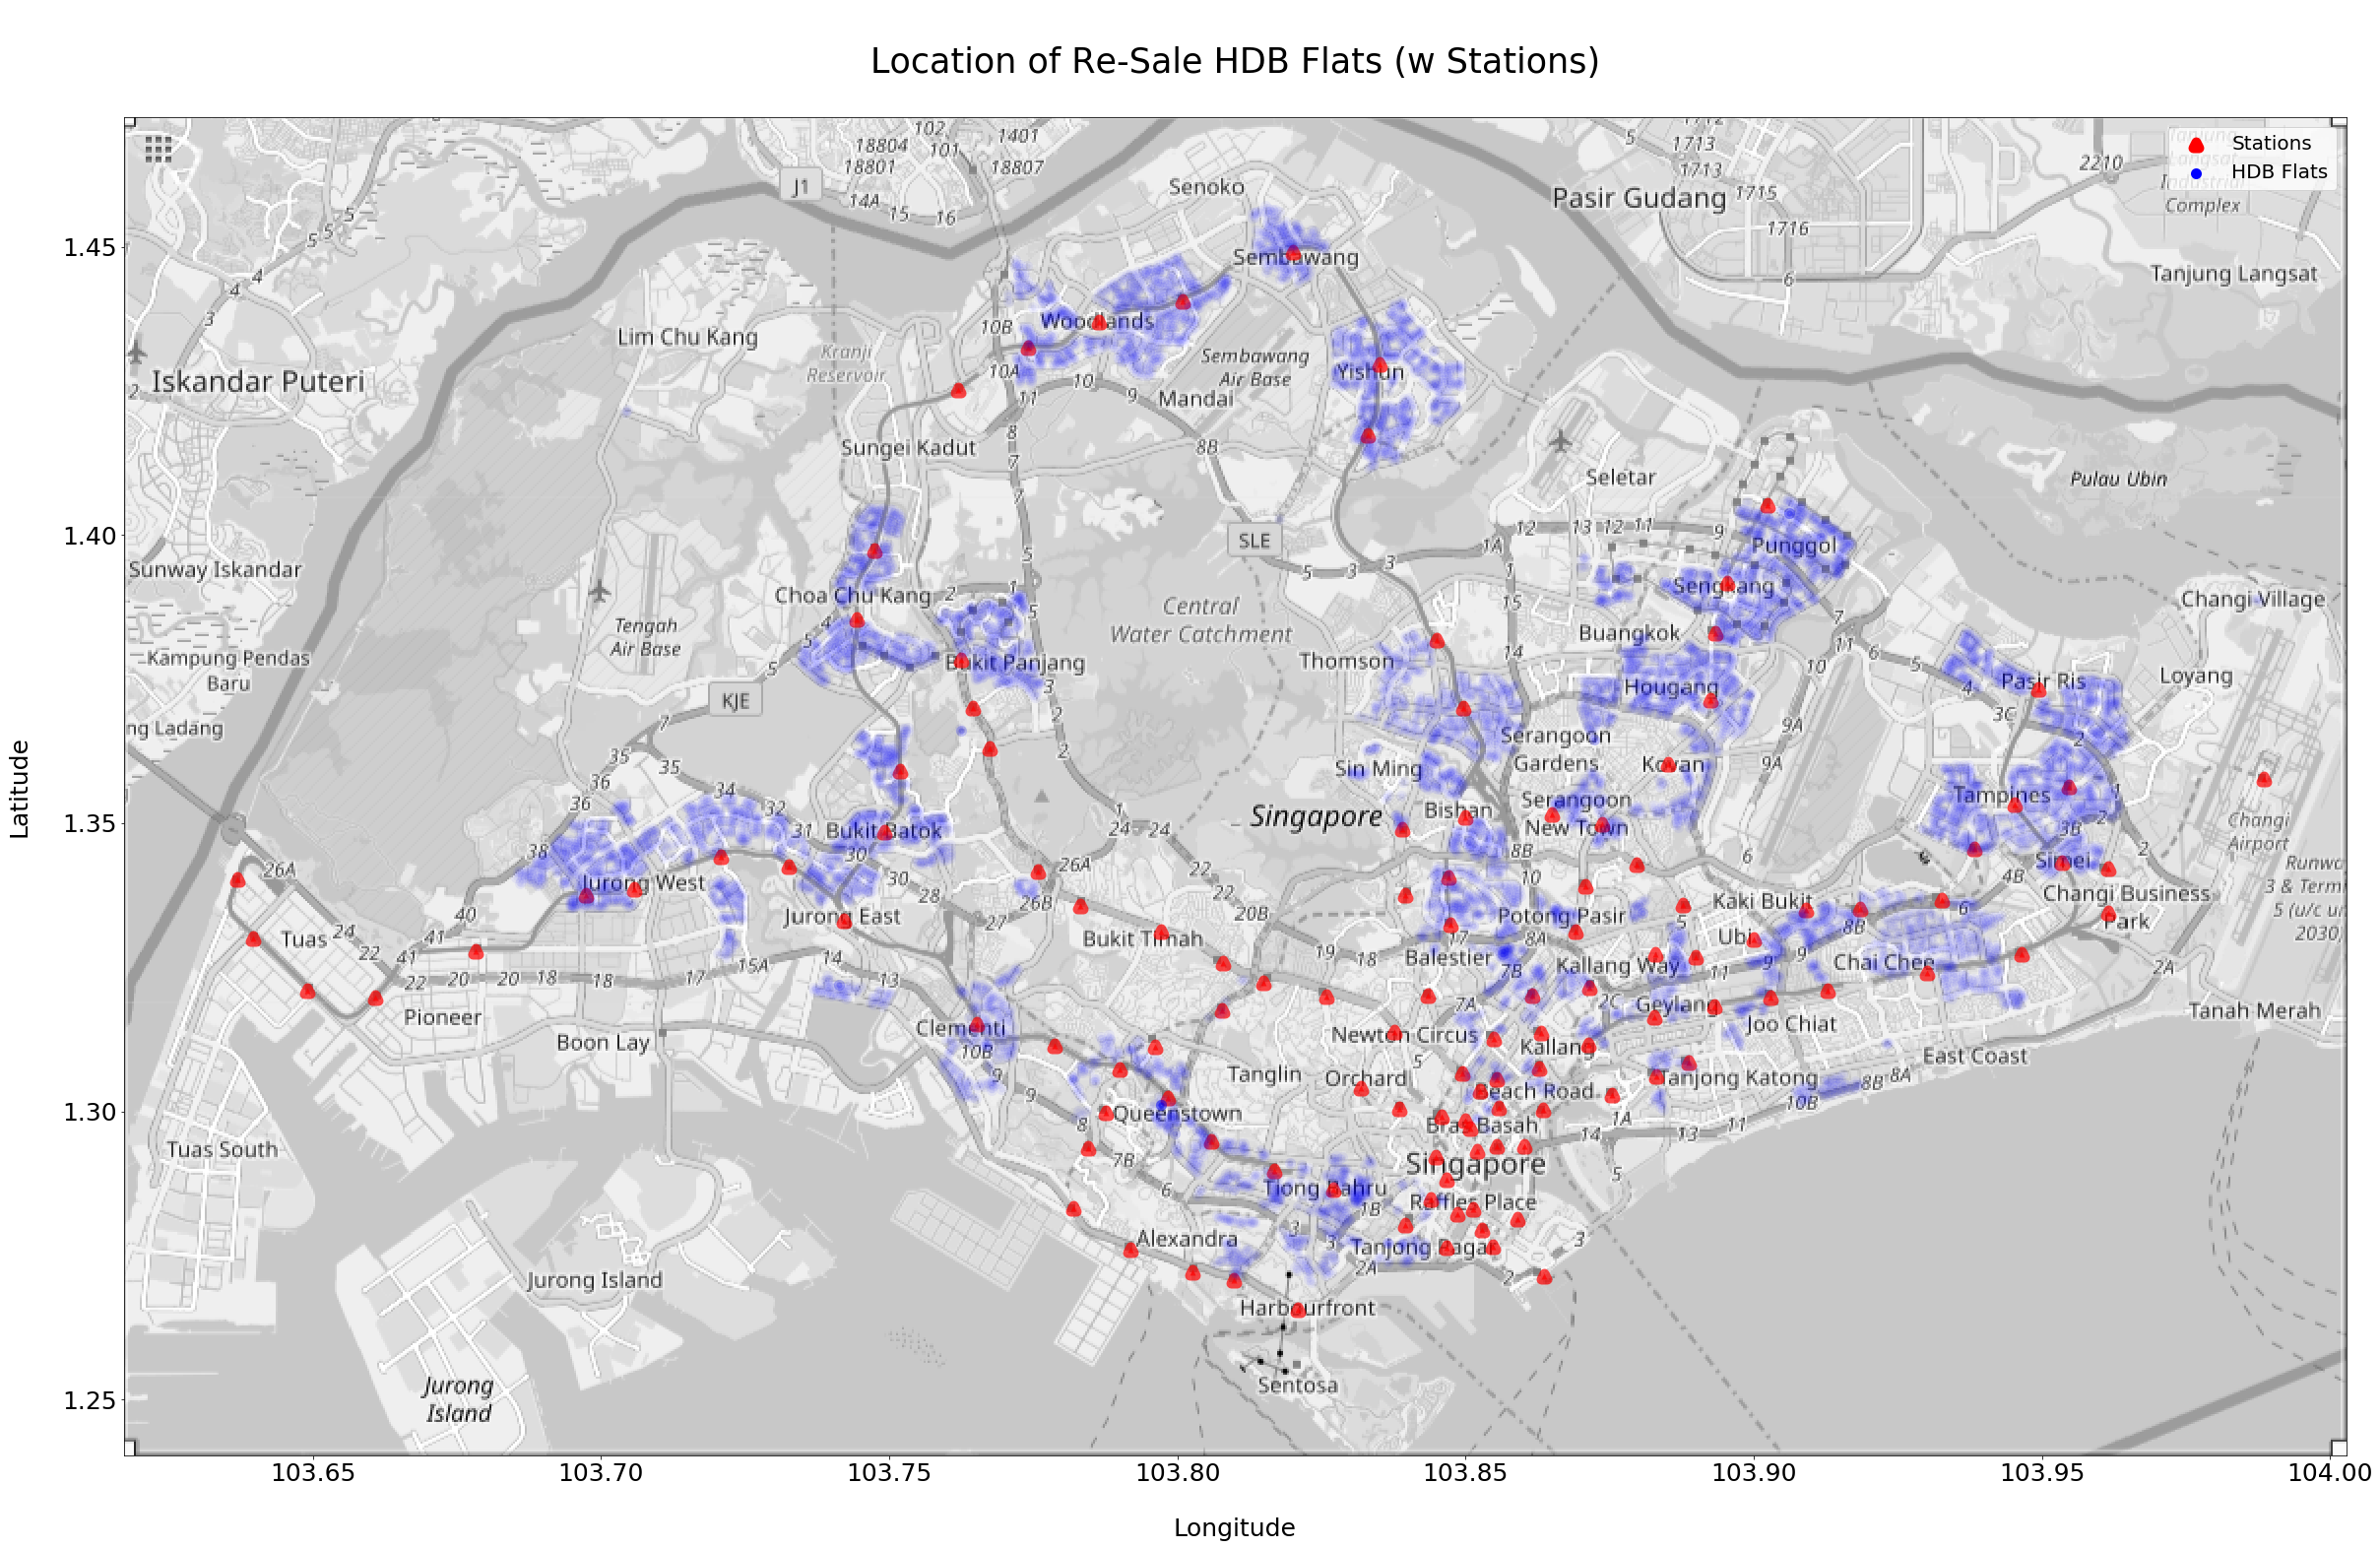

In [33]:
lon_lat_box = (103.6172, 104.0028, 1.2403, 1.4725)

plt.figure(figsize=(50,25))
plt.imshow(X=arr, cmap='gray',
           extent=lon_lat_box)
plt.xlabel('\nLongitude', fontsize=25)
plt.ylabel('Latitude\n', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nLocation of Re-Sale HDB Flats (w Stations)\n', fontsize=25)

plt.scatter(stations_lon_lat['Longitude'], stations_lon_lat['Latitude'], marker='^', c='r', facecolors='red', lw=10, alpha=0.7, label='Stations')
plt.scatter(streets_lon_lat['Longitude'], streets_lon_lat['Latitude'], marker='o', c='blue', facecolors='red', lw=5, alpha=0.05, label='HDB Flats')
# plt.scatter(all_data['Longitude'], all_data['Latitude'], marker='o', c='blue', lw=0.1, alpha=0.002, label='HDB Flats')
# plt.scatter(flat_primary_distance['Primary Longitude'], flat_primary_distance['Primary Latitude'], marker='x', c='black', lw=5, label='Primary Schools')
# plt.scatter(flat_secondary_distance['Secondary Longitude'], flat_secondary_distance['Secondary Latitude'], marker='+', c='orange', lw=5, label='Secondary Schools')


leg = plt.legend(loc='upper right', fontsize=20)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

# np.savetxt('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).txt', arr)

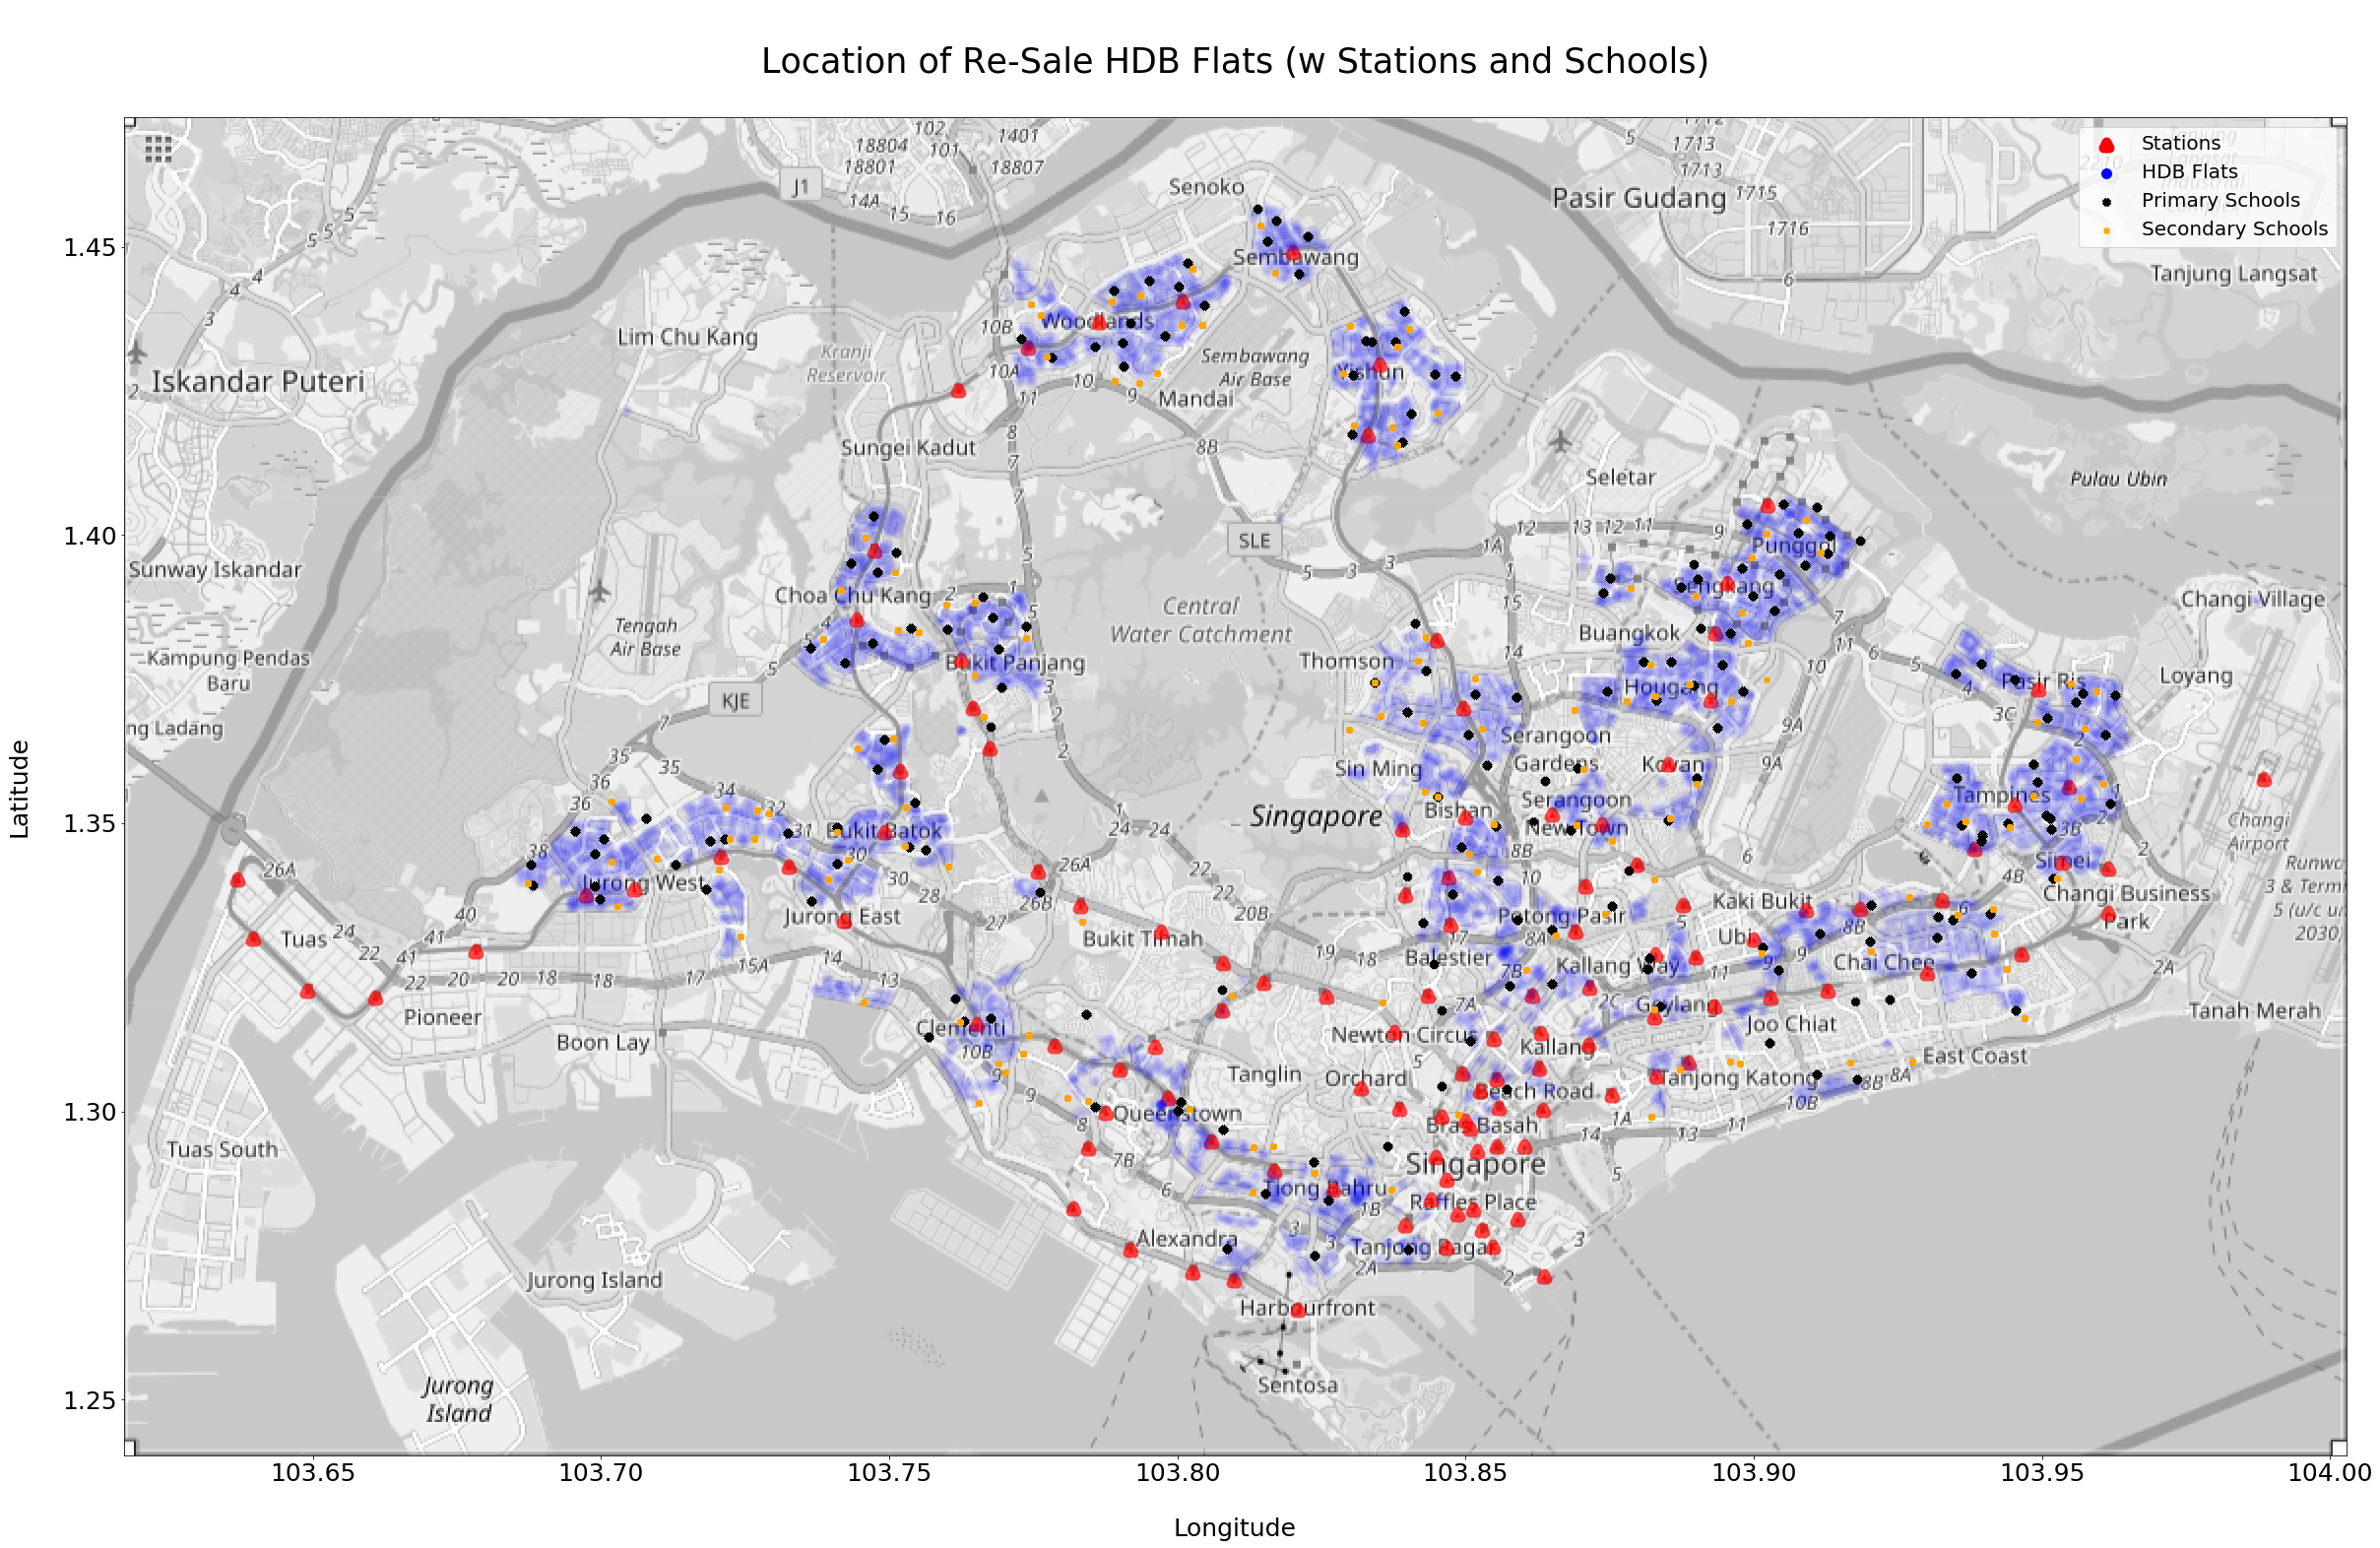

In [34]:
lon_lat_box = (103.6172, 104.0028, 1.2403, 1.4725)

plt.figure(figsize=(50,25))
plt.imshow(X=arr, cmap='gray',
           extent=lon_lat_box)
plt.xlabel('\nLongitude', fontsize=25)
plt.ylabel('Latitude\n', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nLocation of Re-Sale HDB Flats (w Stations and Schools)\n', fontsize=25)

plt.scatter(stations_lon_lat['Longitude'], stations_lon_lat['Latitude'], marker='^', c='r', facecolors='red', lw=10, alpha=0.7, label='Stations')
plt.scatter(streets_lon_lat['Longitude'], streets_lon_lat['Latitude'], marker='o', c='blue', facecolors='red', lw=5, alpha=0.05, label='HDB Flats')
# plt.scatter(all_data['Longitude'], all_data['Latitude'], marker='o', c='blue', lw=0.1, alpha=0.002, label='HDB Flats')
plt.scatter(flat_primary_distance['Primary Longitude'], flat_primary_distance['Primary Latitude'], marker='x', c='black', lw=5, label='Primary Schools')
plt.scatter(flat_secondary_distance['Secondary Longitude'], flat_secondary_distance['Secondary Latitude'], marker='+', c='orange', lw=5, label='Secondary Schools')


leg = plt.legend(loc='upper right', fontsize=20)
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.show()

# np.savetxt('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).txt', arr)

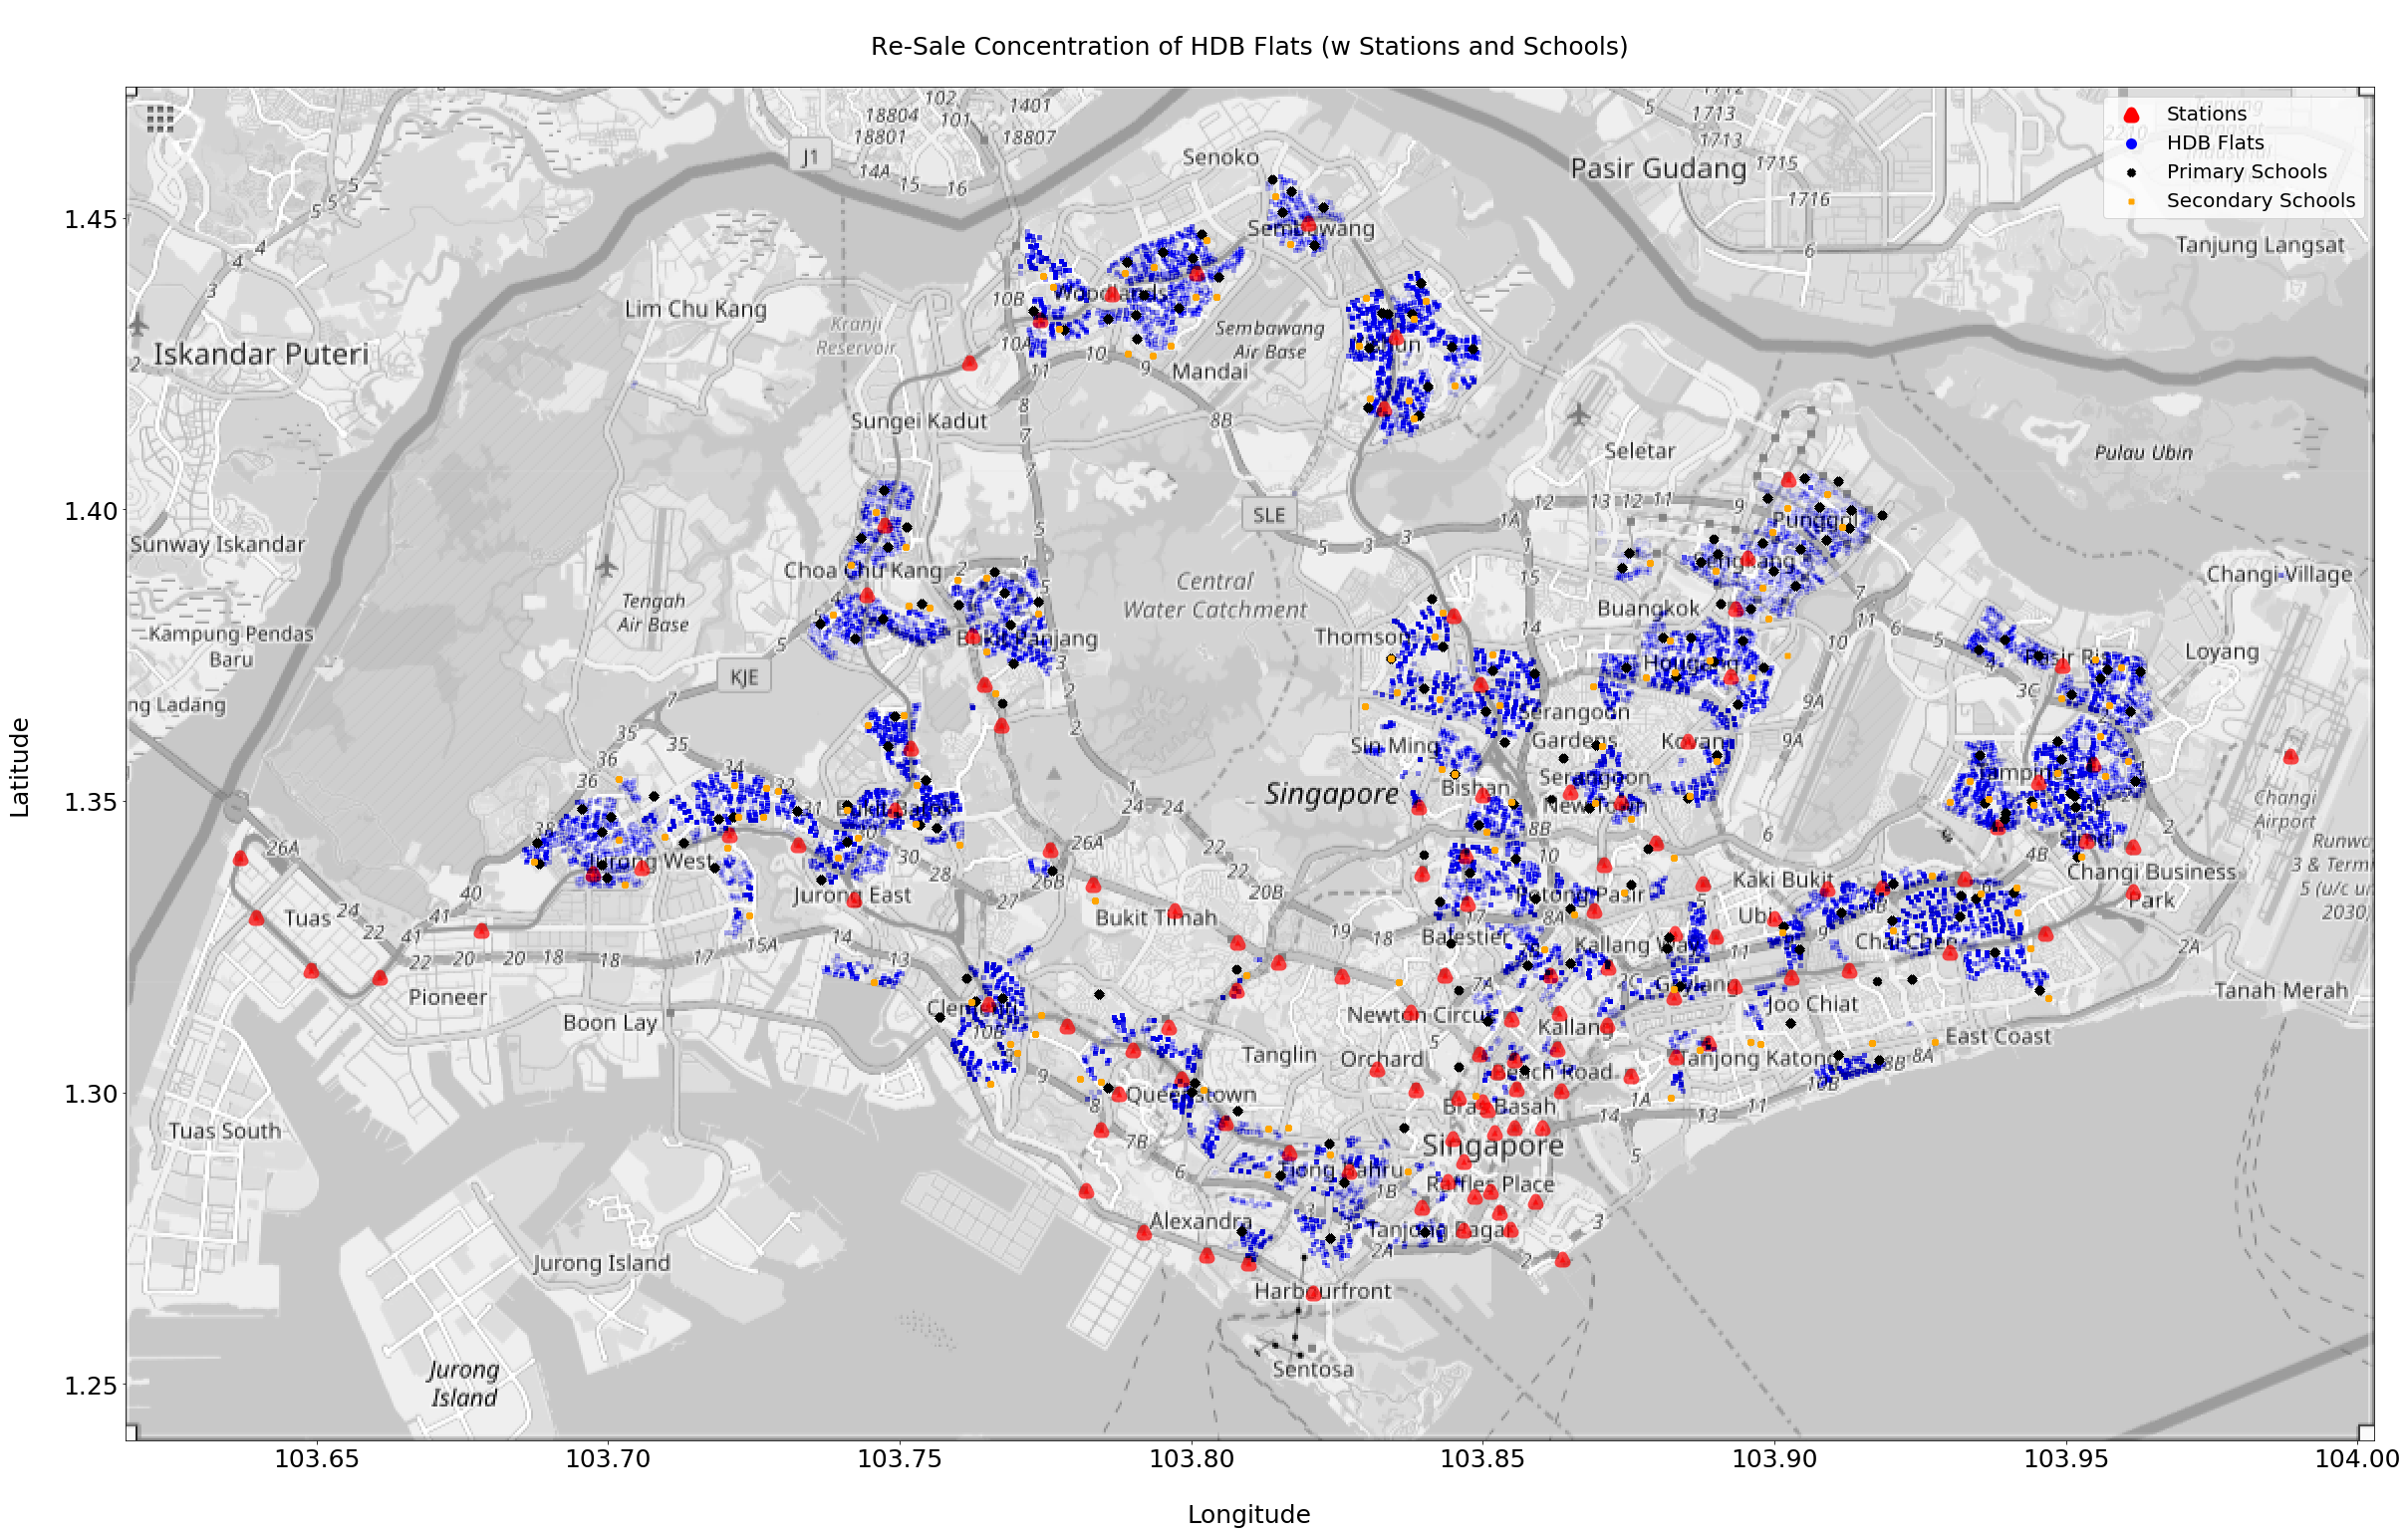

In [86]:
lon_lat_box = (103.6172, 104.0028, 1.2403, 1.4725)

plt.figure(figsize=(50,25))
plt.imshow(X=arr, cmap='gray',
           extent=lon_lat_box)
plt.xlabel('\nLongitude', fontsize=25)
plt.ylabel('Latitude\n', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('\nRe-Sale Concentration of HDB Flats (w Stations and Schools)\n', fontsize=25)

plt.scatter(stations_lon_lat['Longitude'], stations_lon_lat['Latitude'], marker='^', c='r', facecolors='red', lw=10, alpha=0.7, label='Stations')
# plt.scatter(streets_lon_lat['Longitude'], streets_lon_lat['Latitude'], marker='o', c='blue', facecolors='red', lw=5, alpha=0.05, label='HDB Flats')
plt.scatter(all_data['Longitude'], all_data['Latitude'], marker='o', c='blue', lw=0.1, alpha=0.002, label='HDB Flats')
plt.scatter(flat_primary_distance['Primary Longitude'], flat_primary_distance['Primary Latitude'], marker='x', c='black', lw=5, label='Primary Schools')
plt.scatter(flat_secondary_distance['Secondary Longitude'], flat_secondary_distance['Secondary Latitude'], marker='+', c='orange', lw=5, label='Secondary Schools')


leg = plt.legend(loc='upper right', fontsize=20)
for i, lh in enumerate(leg.legendHandles):
    lh.set_alpha(1)
    if i != 0:
        lh.set_linewidth(5)

plt.show()

# np.savetxt('./datasets/SingaporeMap (1.2403-1.4725 -- 103.6172-104.0028).txt', arr)

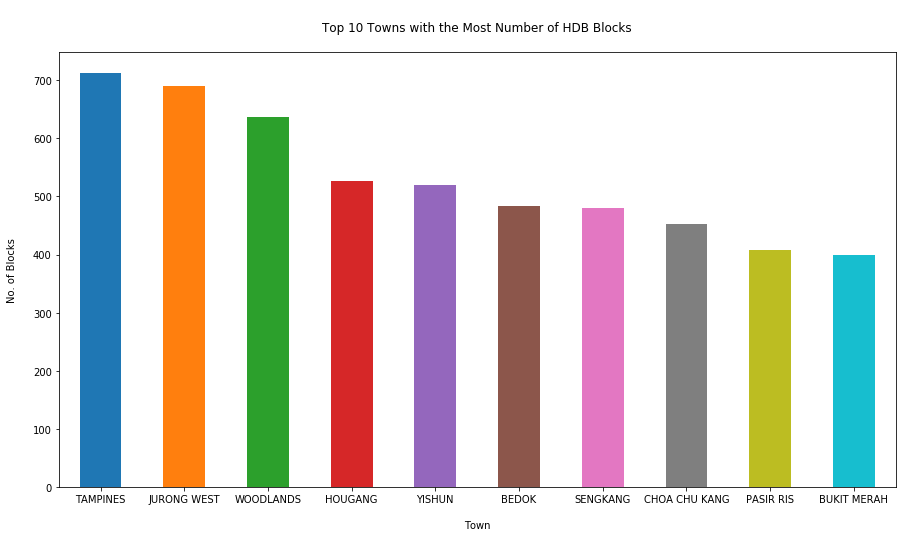

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

all_data.drop_duplicates(subset=['Street Name', 'Block'])['Town'].value_counts().head(10).plot(kind='bar', ax=ax)
plt.title('\nTop 10 Towns with the Most Number of HDB Blocks\n')
plt.xlabel('\nTown')
plt.ylabel('No. of Blocks\n')
plt.xticks(rotation=0)
plt.show()

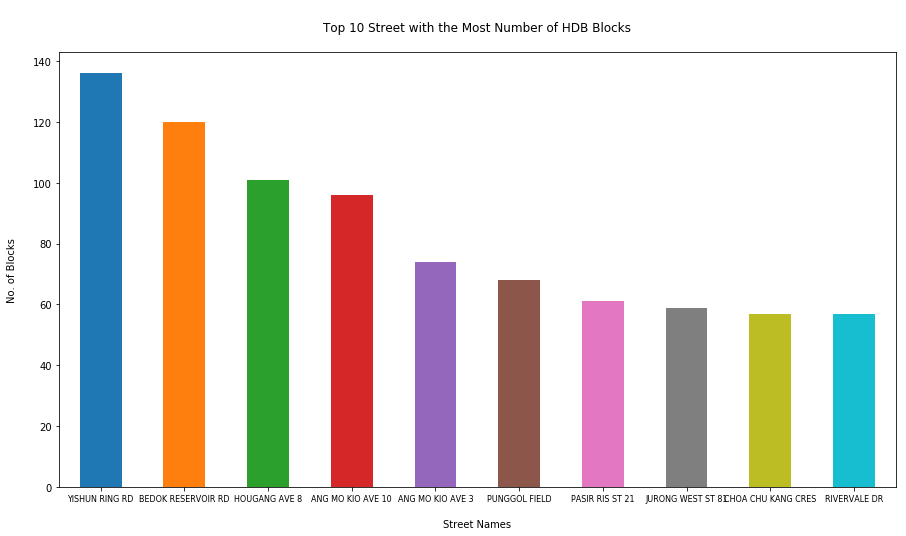

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

all_data.drop_duplicates(subset=['Street Name', 'Block'])['Street Name'].value_counts().head(10).plot(kind='bar', ax=ax)
plt.title('\nTop 10 Street with the Most Number of HDB Blocks\n')
plt.xlabel('\nStreet Names')
plt.ylabel('No. of Blocks\n')
plt.xticks(rotation=0, fontsize=8)
plt.show()

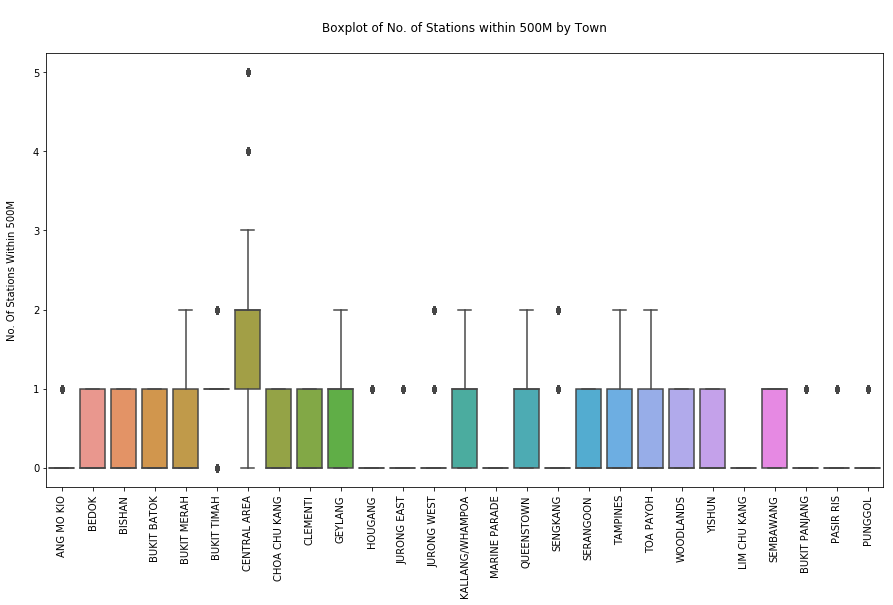

In [107]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=all_data.drop_duplicates(subset=['Block', 'Street Name','Month']), x='Town', y='No. Of Stations Within 500M', ax=ax)
plt.title('\nBoxplot of No. of Stations within 500M by Town\n')
plt.ylabel('No. Of Stations Within 500M\n')
plt.xlabel(None)
plt.xticks(rotation=90)
plt.show()

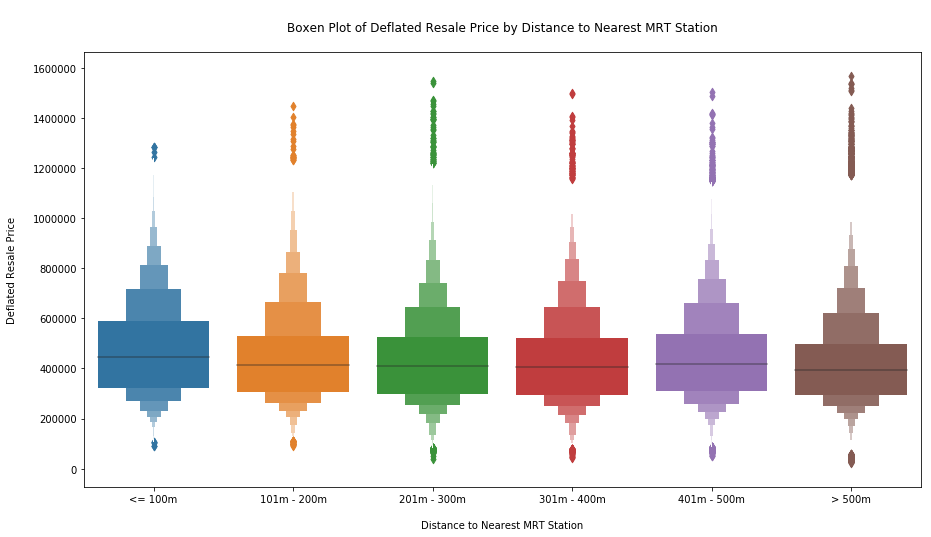

In [42]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Distance To Nearest Station', y='Deflated Resale Price', order=['<= 100m', '101m - 200m', '201m - 300m', '301m - 400m', '401m - 500m', '> 500m'], ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Distance to Nearest MRT Station\n')
plt.xlabel('\nDistance to Nearest MRT Station')
plt.ylabel('Deflated Resale Price\n')
plt.show()

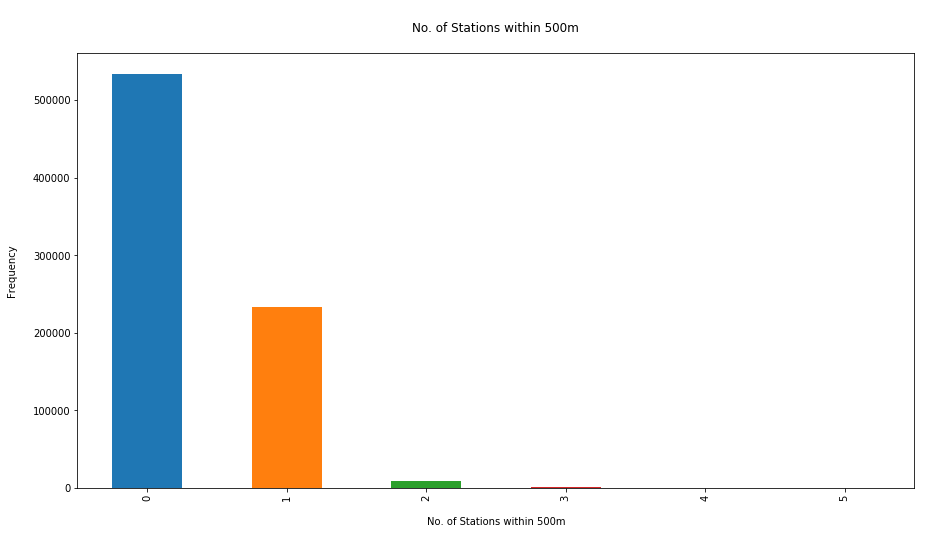

In [2]:
fig, ax = plt.subplots(figsize=(15, 8))
all_data['No. Of Stations Within 500M'].value_counts().sort_index().plot(kind='bar',ax=ax)
plt.title('\nNo. of Stations within 500m\n')
plt.xlabel('\nNo. of Stations within 500m')
plt.ylabel('Frequency\n')
plt.show()

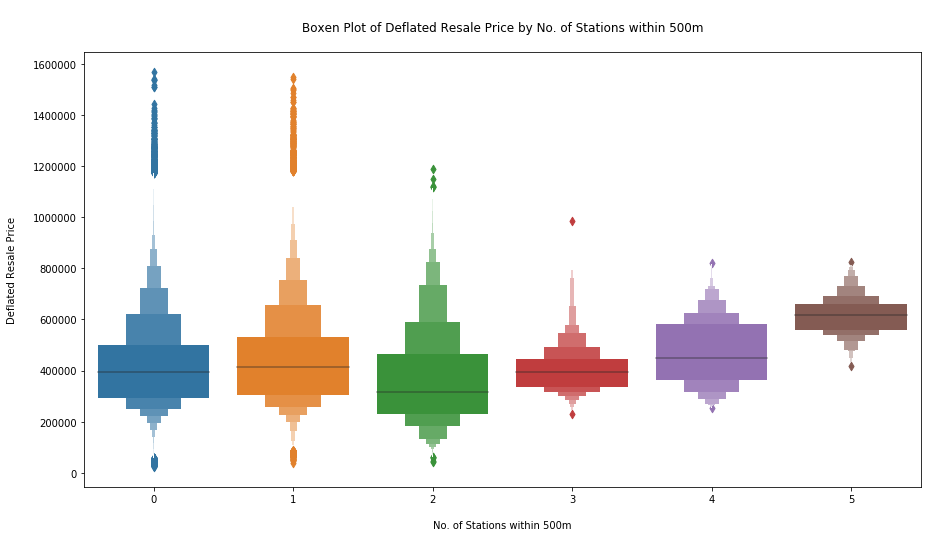

In [36]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='No. Of Stations Within 500M', y='Deflated Resale Price', ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by No. of Stations within 500m\n')
plt.xlabel('\nNo. of Stations within 500m')
plt.ylabel('Deflated Resale Price\n')
plt.show()

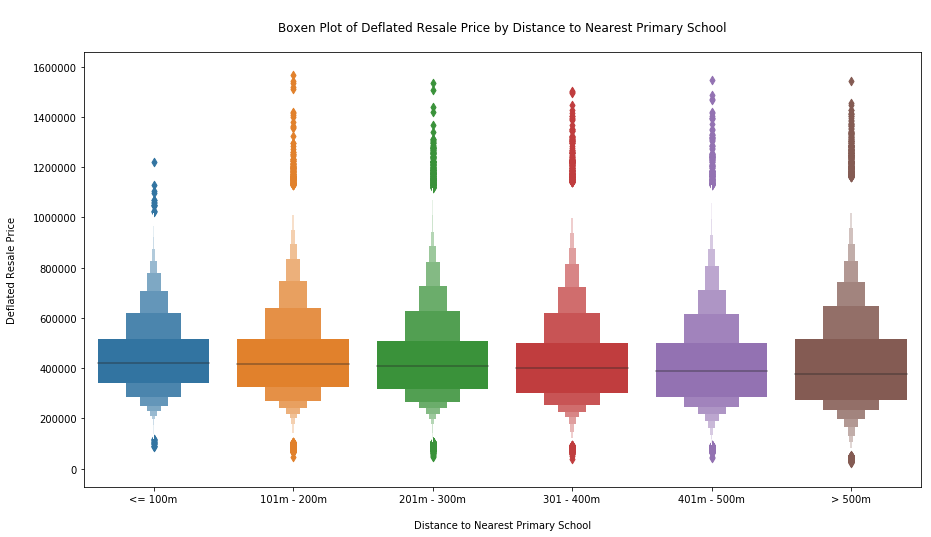

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Primary Distance Categorised', y='Deflated Resale Price', order=['<= 100m', '101m - 200m', '201m - 300m', '301 - 400m', '401m - 500m', '> 500m'], ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Distance to Nearest Primary School\n')
plt.xlabel('\nDistance to Nearest Primary School')
plt.ylabel('Deflated Resale Price\n')
plt.show()

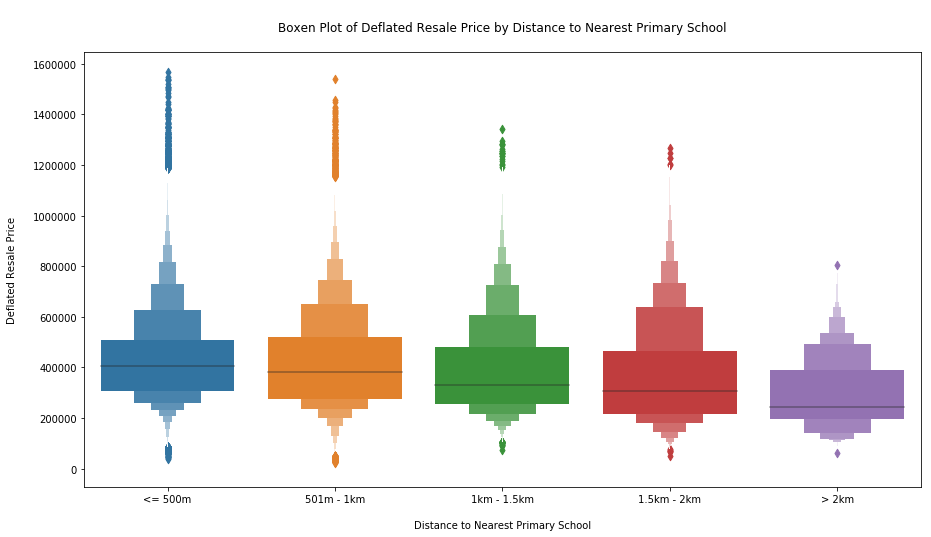

In [66]:
all_data['Additional Primary Distance Categorised'] = all_data['Primary Distance'].apply(lambda x: '<= 500m' if x <= 500 else ('501m - 1km' if x <= 1000 else ('1km - 1.5km' if x <= 1500 else ('1.5km - 2km' if x <= 2000 else '> 2km'))))

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Additional Primary Distance Categorised', y='Deflated Resale Price', order=['<= 500m', '501m - 1km', '1km - 1.5km', '1.5km - 2km', '> 2km'], ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Distance to Nearest Primary School\n')
plt.xlabel('\nDistance to Nearest Primary School')
plt.ylabel('Deflated Resale Price\n')
plt.show()

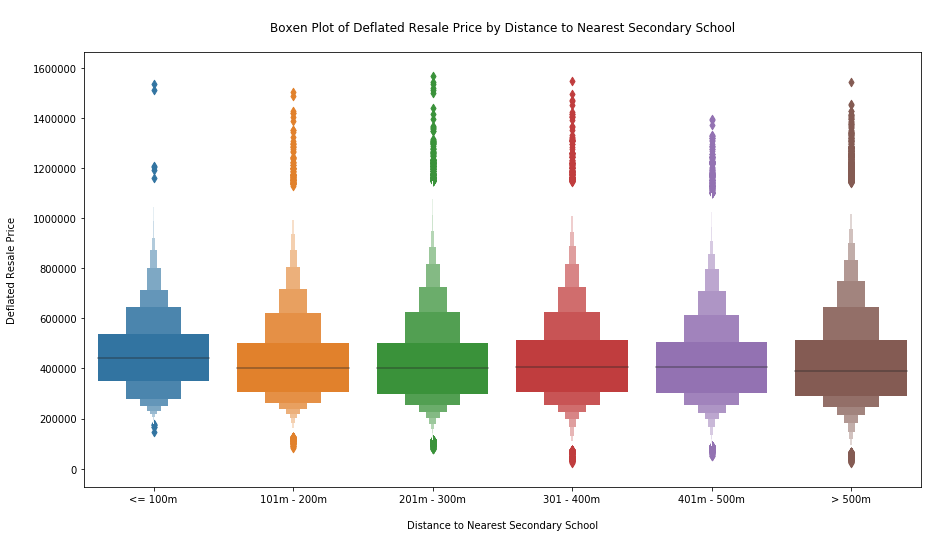

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Secondary Distance Categorised', y='Deflated Resale Price', order=['<= 100m', '101m - 200m', '201m - 300m', '301 - 400m', '401m - 500m', '> 500m'], ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Distance to Nearest Secondary School\n')
plt.xlabel('\nDistance to Nearest Secondary School')
plt.ylabel('Deflated Resale Price\n')
plt.show()

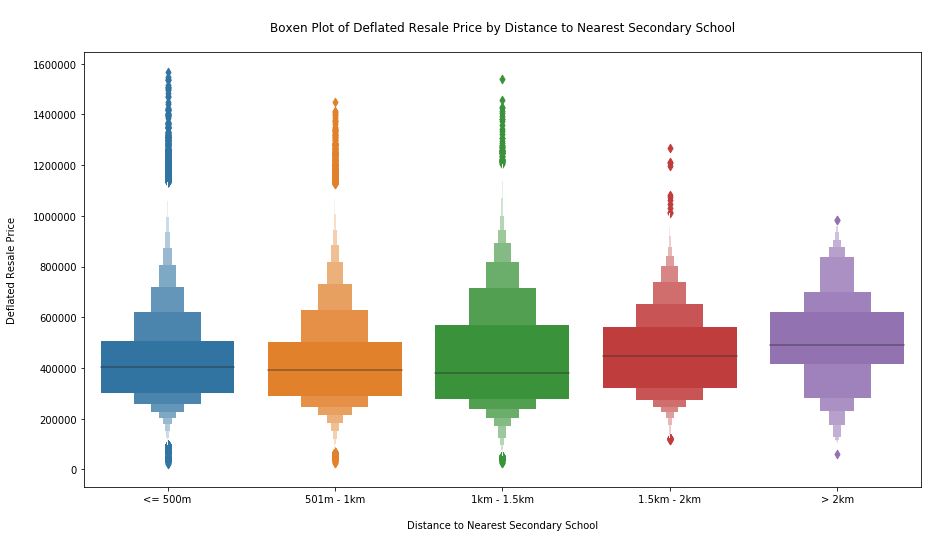

In [67]:
all_data['Additional Secondary Distance Categorised'] = all_data['Secondary Distance'].apply(lambda x: '<= 500m' if x <= 500 else ('501m - 1km' if x <= 1000 else ('1km - 1.5km' if x <= 1500 else ('1.5km - 2km' if x <= 2000 else '> 2km'))))

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Additional Secondary Distance Categorised', y='Deflated Resale Price', order=['<= 500m', '501m - 1km', '1km - 1.5km', '1.5km - 2km', '> 2km'], ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Distance to Nearest Secondary School\n')
plt.xlabel('\nDistance to Nearest Secondary School')
plt.ylabel('Deflated Resale Price\n')
plt.show()

## Property Features EDA

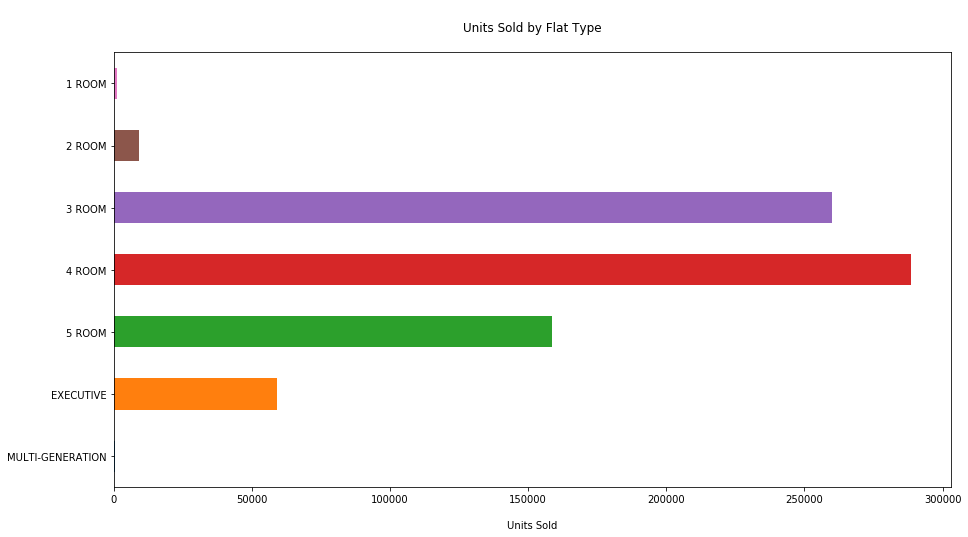

In [50]:
all_data['Flat Type'].value_counts().sort_index(ascending=False).plot(kind='barh', figsize=(15, 8))
plt.title('\nUnits Sold by Flat Type\n')
plt.xlabel('\nUnits Sold')
plt.show()

C:\Users\Elroy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


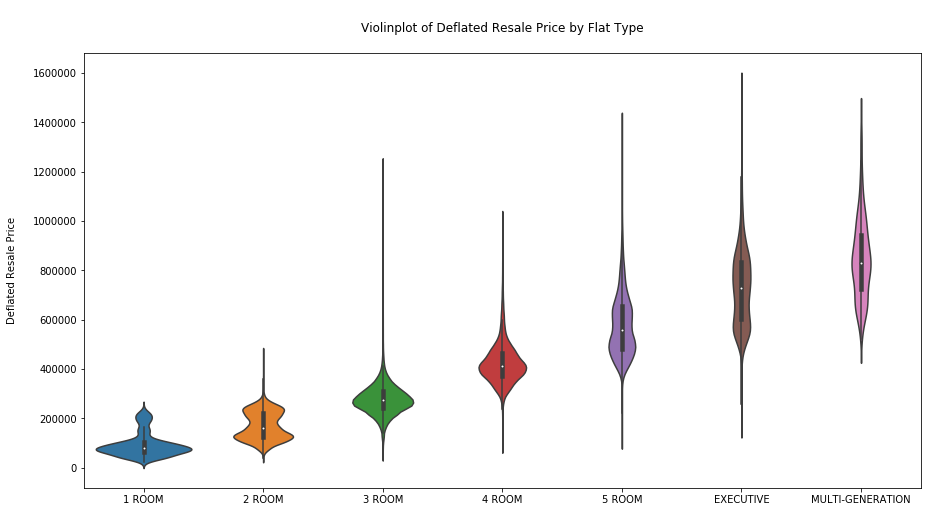

In [55]:
fig, ax = plt.subplots(figsize=(15, 8))

sns.violinplot(data=all_data, x='Flat Type', y='Deflated Resale Price', order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION'], ax=ax)
plt.title('\nViolinplot of Deflated Resale Price by Flat Type\n')
plt.xlabel(None)
plt.ylabel('Deflated Resale Price\n')
plt.show()

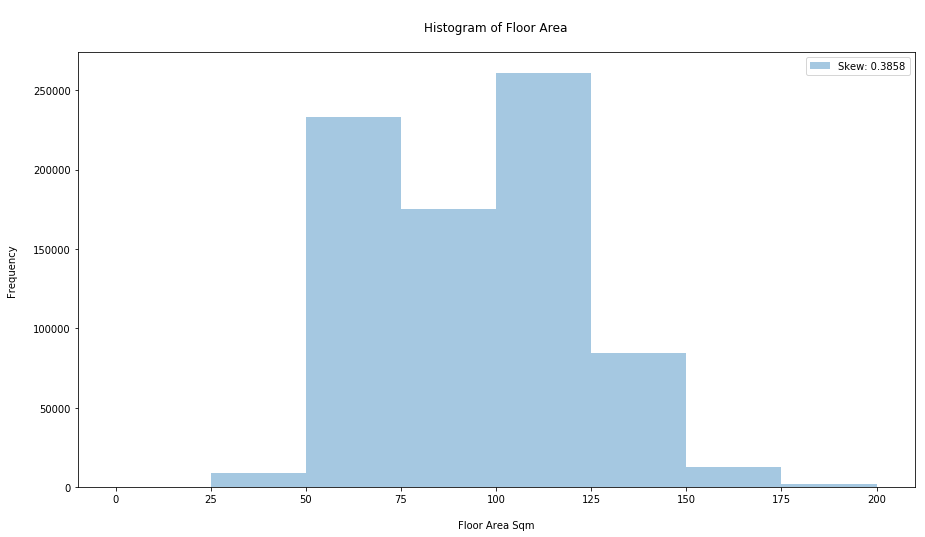

In [97]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = np.arange(0, 201, 25)
sns.distplot(all_data['Floor Area Sqm'], kde=False, bins=bins, ax=ax)
plt.title('\nHistogram of Floor Area\n')
plt.ylabel('Frequency\n')
plt.xlabel('\nFloor Area Sqm')
plt.legend(['Skew: {}'.format(round(stats.skew(all_data['Floor Area Sqm']), 4))])
plt.show()

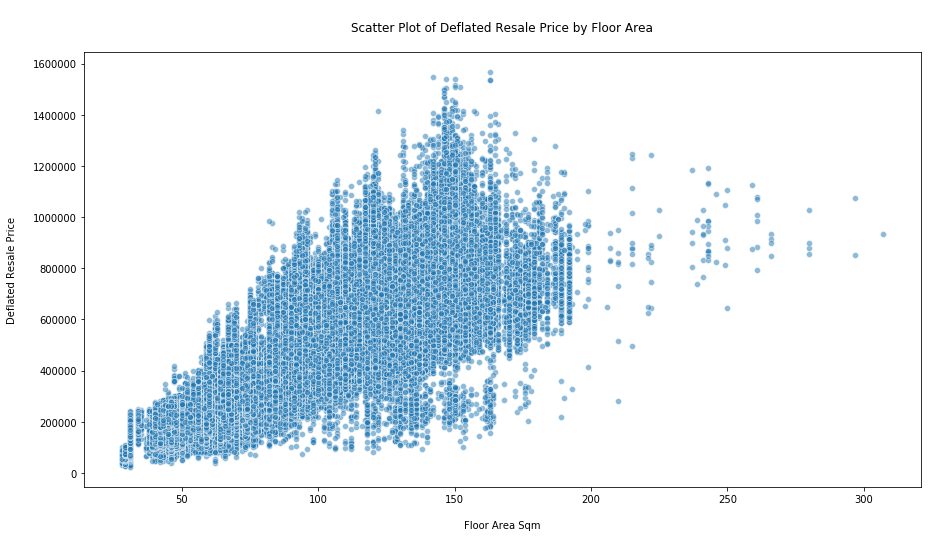

In [74]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=all_data, x='Floor Area Sqm', y='Deflated Resale Price', ax=ax, alpha=0.5)
plt.title('\nScatter Plot of Deflated Resale Price by Floor Area\n')
plt.xlabel('\nFloor Area Sqm')
plt.ylabel('Deflated Resale Price\n')
plt.show()

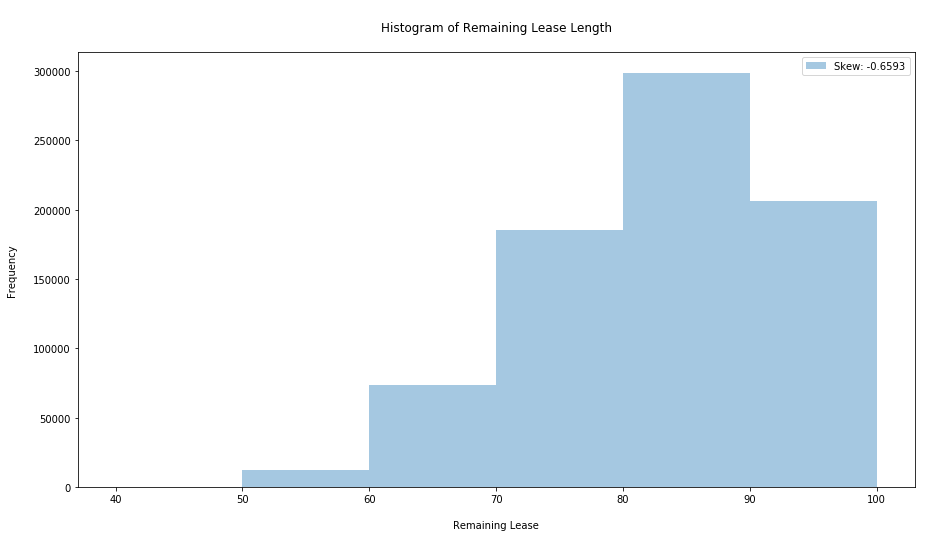

In [98]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = np.arange(40, 101, 10)
sns.distplot(all_data['Remaining Lease'], kde=False, bins=bins, ax=ax)
plt.title('\nHistogram of Remaining Lease Length\n')
plt.ylabel('Frequency\n')
plt.xlabel('\nRemaining Lease')
plt.legend(['Skew: {}'.format(round(stats.skew(all_data['Remaining Lease']), 4))])
plt.show()

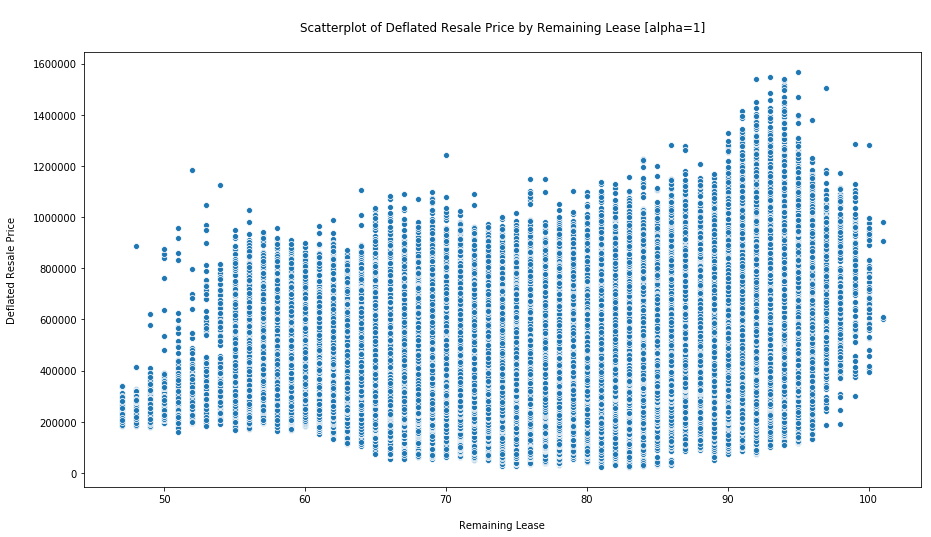

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=all_data, x='Remaining Lease', y='Deflated Resale Price', alpha=1, ax=ax)
plt.title('\nScatterplot of Deflated Resale Price by Remaining Lease [alpha=1]\n')
plt.xlabel('\nRemaining Lease')
plt.ylabel('Deflated Resale Price\n')
plt.show()

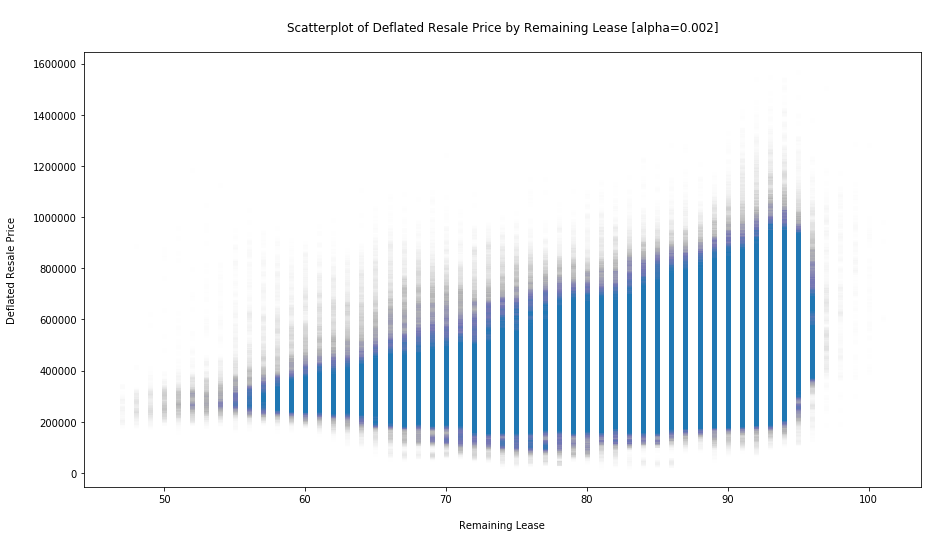

In [21]:
alpha=0.002

fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=all_data, x='Remaining Lease', y='Deflated Resale Price', alpha=alpha, ax=ax)
plt.title('\nScatterplot of Deflated Resale Price by Remaining Lease [alpha={}]\n'.format(alpha))
plt.xlabel('\nRemaining Lease')
plt.ylabel('Deflated Resale Price\n')
plt.show()

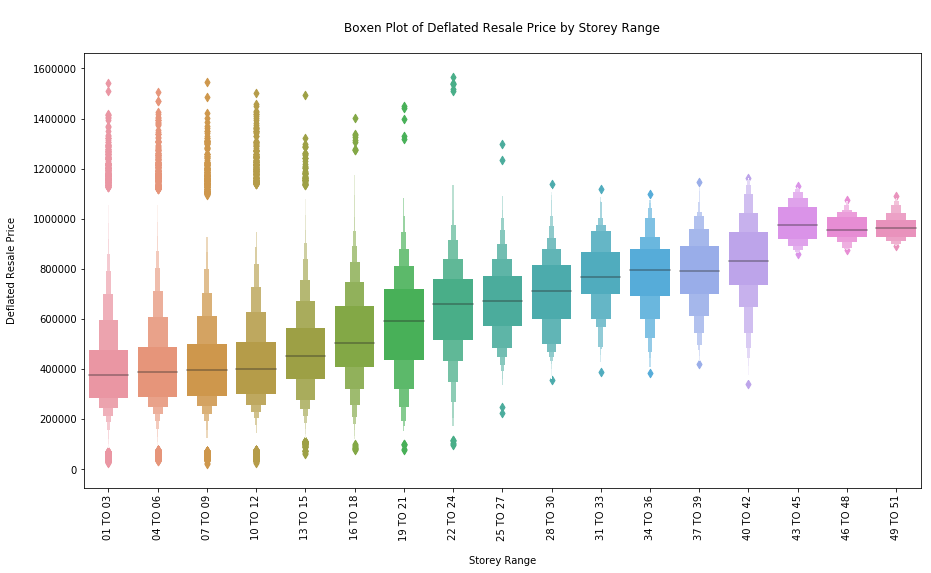

In [30]:
order = sorted(all_data['Storey Range'].unique())

fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Storey Range', y='Deflated Resale Price', ax=ax, order=order)
plt.title('\nBoxen Plot of Deflated Resale Price by Storey Range\n')
plt.ylabel('Deflated Resale Price\n')
plt.xlabel('\nStorey Range')
plt.xticks(rotation=90)
plt.show()

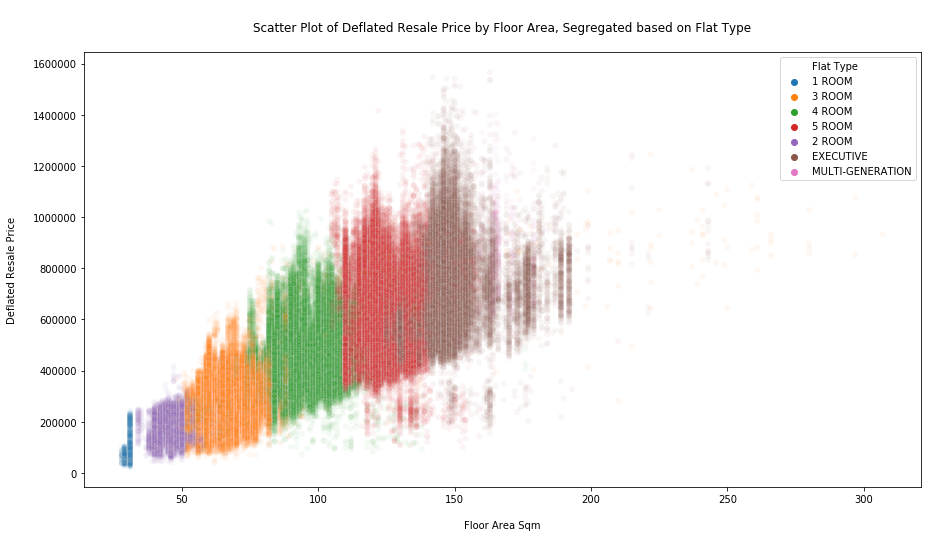

In [122]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=all_data, x='Floor Area Sqm', y='Deflated Resale Price', alpha=0.05, hue='Flat Type', ax=ax)
plt.title('\nScatter Plot of Deflated Resale Price by Floor Area, Segregated based on Flat Type\n')
plt.xlabel('\nFloor Area Sqm')
plt.ylabel('Deflated Resale Price\n')
plt.show()

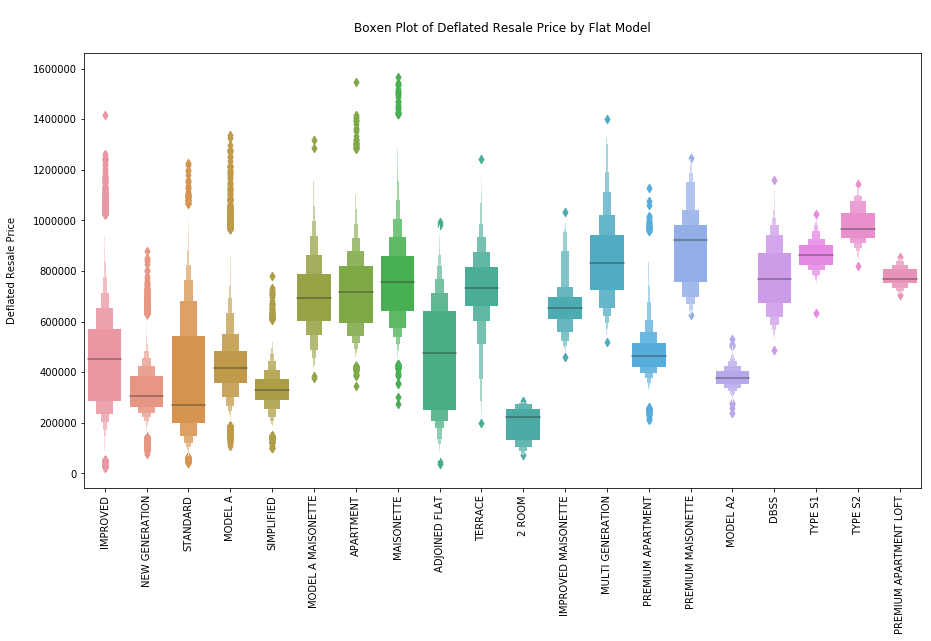

In [121]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.boxenplot(data=all_data, x='Flat Model', y='Deflated Resale Price', ax=ax)
plt.title('\nBoxen Plot of Deflated Resale Price by Flat Model\n')
plt.ylabel('Deflated Resale Price\n')
plt.xlabel(None)
plt.xticks(rotation=90)
plt.show()

## Target Variable EDA

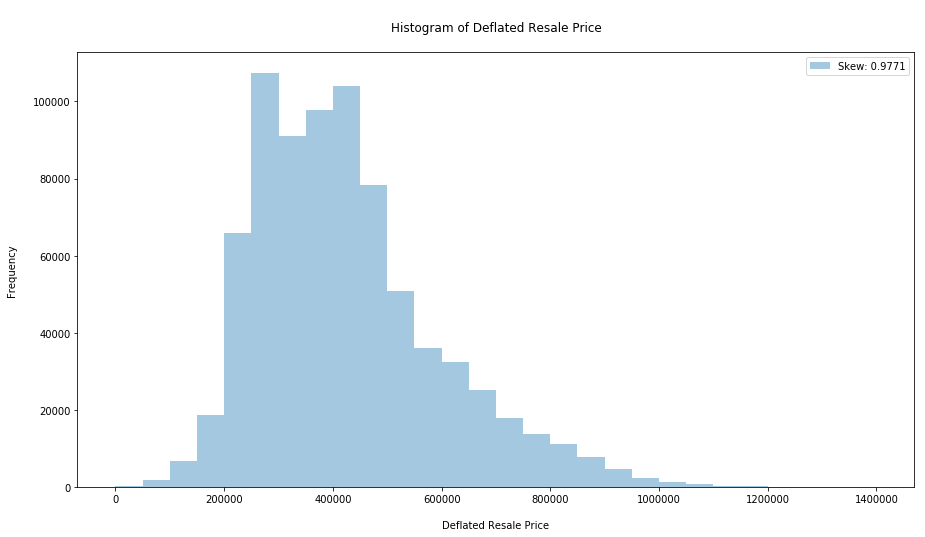

In [110]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = np.arange(0, 1400001, 50000)
sns.distplot(all_data['Deflated Resale Price'], kde=False, bins=bins, ax=ax)
plt.title('\nHistogram of Deflated Resale Price\n')
plt.xlabel('\nDeflated Resale Price')
plt.ylabel('Frequency\n')
plt.legend(['Skew: {}'.format(round(stats.skew(all_data['Deflated Resale Price']), 4))])
plt.show()

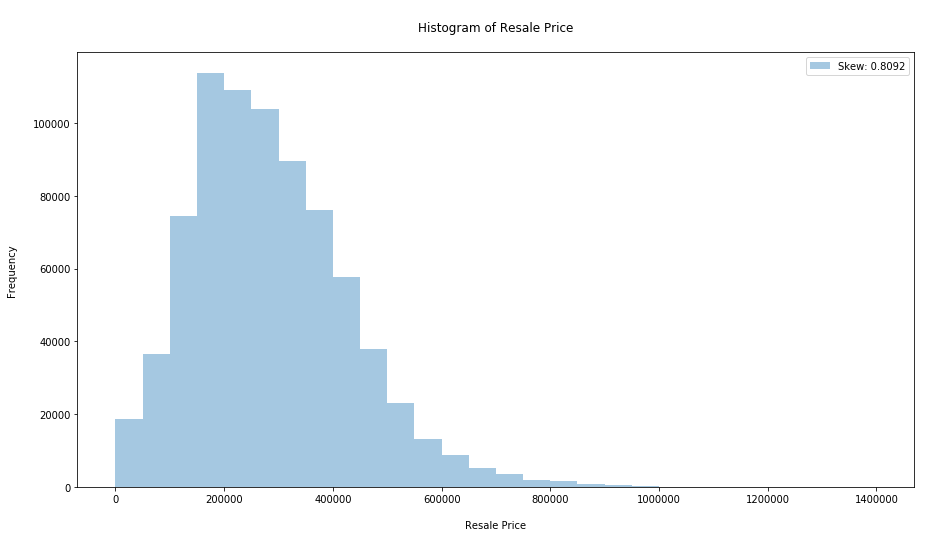

In [111]:
fig, ax = plt.subplots(figsize=(15, 8))
bins = np.arange(0, 1400001, 50000)
sns.distplot(all_data['Resale Price'], kde=False, bins=bins, ax=ax)
plt.title('\nHistogram of Resale Price\n')
plt.xlabel('\nResale Price')
plt.ylabel('Frequency\n')
plt.legend(['Skew: {}'.format(round(stats.skew(all_data['Resale Price']), 4))])
plt.show()